深度学习基础1

本节内容主要为深度学习的基础知识

编码过程主要使用numpy作为基础，并对应tensorflow以及pytorch


参考书目：

深度学习入门：基于python的理论与实现

深度学习的数学


1.感知机


感知机是神经网络的的起源算法。学习感知机是深度学习中重要的思想。



### 激活函数

[-5 -4 -3 -2 -1  0  1  2  3  4]
[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379]


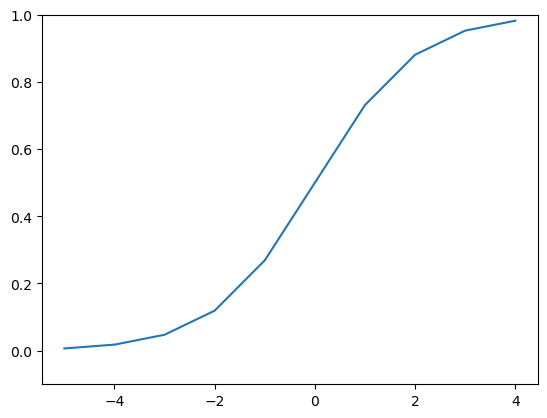

In [1]:
import numpy as np 
import matplotlib.pylab as plt 
def sigmoid(x:np.array)->np.array:
    return 1/(1+np.exp(-x))


x=np.arange(-5,5,1)
print(x)
y=sigmoid(x)
print(y)
plt.ylim(-0.1,1)
plt.plot(x,y)

通过numpy构建一个基础的神经网络


$$A^1=XW^1+B^1$$
其中$W^1$为第0层权重系数矩阵，$B^1$为第0层的偏置参数矩阵，$A^1$为第0层计算得到的网络节点结果,$x$为最初的神经网络结点

在此设初始节点有两个，第一层网络有三个节点，对应的变量矩阵与系数矩阵形状为
$X_{(1 \times 2)}$初始节点为两个
$W_{(2 \times 3)}$系数矩阵行与初始节点相同，列与第一层节点书目（3个）相同
$A_{3 \times 1}$

$$\begin{equation}\begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \cdot \begin{bmatrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{bmatrix} = \begin{bmatrix}1 & 2 & 3 \\4 & 5 & 6\\7 & 8 & 9\end{bmatrix} \end{equation}
$$


In [28]:
import numpy as np  
x=np.array([1,0.5])#初始网络有两个节点，并赋值
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])#对应第二层网络
B1=np.array([0.1,0.2,0.3])#
A1=x@W1+B1
A1

array([0.3, 0.7, 1.1])

在以上网络基本结构基础上，加入激活函数$h()$通过激活函数，第1层第n个节点结果$a_n$代入运算，得到该节点计算后的新的数值，该数值又作为下一层节点计算的输入节点。

In [29]:
Z1=sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

第2层节点设为2个节点，计算方式与第一层相同，即：
$$A^2=Z^1W^2+B^2$$
$$$$
其中$W^2$形状为（3，2）对应第一层Z1三个节点，第二层两个节点
$B^2$对应第二层两个节点

In [30]:
W2=np.array([0.1,0.4,0.2,0.5,0.3,0.6])
W2=W2.reshape(3,2)
B2=np.array([0.1,0.2])
A2=Z1@W2+B2
A2

array([0.51615984, 1.21402696])

同样，第二层输入A2，通过激活函数$h()$，得到对应的两个节点输出Z2
$$Z^2=h(A^2)$$

In [31]:
Z2=sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

最终的输出层为两个节点，但其激活函数有所差别，不使用sigmaod，而是使用恒等函数$i()$
即最终输出的节点Y只与B3偏置矩阵相加，而不经过激活函数计算
$$A^3=Z^2W^3+B^3$$
$$Y=i(A^3)$$

---
输出层的激活函数需根据最终求解的问题来确定：
* 回归问题 —— 一般使用恒等函数
* 二分类问题 —— 可以使用sigmoid函数
* 多分类问题 ——  可以使用softmax函数

In [32]:
def identify(a):
    return a
W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])
A3=Z2@W3+B3
Y=identify(A3)
Y

array([0.31682708, 0.69627909])

综合以上步骤，定义简单3层神经网络类，实现神经网络的计算

类包括基本的

In [23]:
class SimpleNero():
    """_summary_
    
    """
    def __init__(self,x:np.array) -> None:
        self.x=x
        self.network={}
        # 定义3层网络中各个网络参数
        W1=np.array([[0.1,0.2,0.8],[0.2,0.1,0.8]])#对应第一层网络
        B1=np.array([0.2,0.2,0.3])#
        W2=np.array([0.2,0.1,0.5,0.2,0.7,0.8])
        W2=W2.reshape(3,2)
        B2=np.array([0.3,0.5])
        W3=np.array([[0.3,0.2],[0.1,0.4]])
        B3=np.array([0.2,0.3])
        self.network['w1']=W1
        self.network['b1']=B1
        self.network['w2']=W2
        self.network['b2']=B2
        self.network['w3']=W3
        self.network['b3']=B3
    def forword(self):
        print("第一层计算")
        A1=self.x@self.network['w1']+self.network['b1']
  
        Z1=sigmoid(A1)
        A2=Z1@self.network['w2']+self.network['b2']
        Z2=sigmoid(A2)
        A3=Z2@self.network['w3']+self.network['b3']
        y=identify(A3)
        return Y
if __name__=='__main__':
    x=np.array([0.5,0.2])#初始网络有两个节点，并赋值
    simpleNet=SimpleNero(x=x)
    y=simpleNet.forword()
    print(y)
        
        

第一层计算
[0.50781228 0.76345024]


## 输出层激活函数: 恒等函数、 softmax 与 sigmoid函数对比
注意在此讨论的激活函数作用区间都是在层的内部，而不是两个层之间，两个层之间的关系依然是
$$\delta():A_k=Z_{k-1}\times W_k +B_k$$
$$y_k=a_k$$
$$y_k=1/(1+e^{-a_k})$$
$$y_k = \frac{exp(a_k) } {\sum_{i=1}^n exp(a_i)}$$
----
softmax函数特征

* 在网络最后一层，输出层使用softmax得到多分类的结果，其综合概率为1
* softmax函数会出现计算数值过大，为此解决方法是分子分母中对应e参数（节点值）都减去对应常数，一般会使用输入信号最大值。
---
The **softmax** function or **normalized exponential function** is used for the output activation function of a multi-class classifiers. The softmax function is the multinomial generalization of the sigmoid or logistic function. The probability of each class $j$ is written as: 

$$\sigma(z_j) = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

The normalization $\sum_{k=1}^K e^{z_k}$ ensures the sum of probabilities for all classes add to $1.0$. The class selected by the classifier is the class with the largest value of $\sigma(z_j)$.

In [17]:
def softmax(a:np.array)->np.array:
    c=np.max(a)
    return np.exp(a-c)/np.sum(np.exp(a-c))
a=np.array([0.3,2.9,4])
y=softmax(a)
print(y)
print(sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


### 手写数字识别

本案例时间神经网络的“推理处理”，也称为神经网络的向前传播（forward propagation），即先不考虑学习模型问题，而是使用已经学习好的模型（参数）进行模型的推理，得到结论例如分类。

数据集Mnist

以下代码为获取mnist数据集合，并下载到当前文件夹下

In [4]:
import os 


c:\Users\tom\OneDrive\文档\GitHub\IRM_class\Deep Learning


In [51]:
# coding: utf-8
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')
import os.path
import gzip
import pickle
import os
import numpy as np


url_base = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

 
#dataset_dir = os.path.dirname(os.path.abspath(__file__))
dataset_dir='C:\\Users\\tomis\\OneDrive\\LUCK\\luckLab\\irm_-class-master\\IRM_class\\Deep Learning'
dataset_dir=os.path.abspath(".")
save_file = dataset_dir+ "/mnist.pkl"

train_num = 60000
test_num = 10000
img_dim = (1, 28, 28)
img_size = 784


def _download(file_name):
    file_path = dataset_dir + "/" + file_name
    
    if os.path.exists(file_path):
        return

    print("Downloading " + file_name + " ... ")
    urllib.request.urlretrieve(url_base + file_name, file_path)
    print("Done")
    
def download_mnist():
    for v in key_file.values():
       _download(v)
        
def _load_label(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print("Done")
    
    return labels

def _load_img(file_name):
    file_path = dataset_dir + "/" + file_name
    
    print("Converting " + file_name + " to NumPy Array ...")    
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print("Done")
    
    return data
    
def _convert_numpy():
    dataset = {}
    dataset['train_img'] =  _load_img(key_file['train_img'])
    dataset['train_label'] = _load_label(key_file['train_label'])    
    dataset['test_img'] = _load_img(key_file['test_img'])
    dataset['test_label'] = _load_label(key_file['test_label'])
    
    return dataset

def init_mnist():
    download_mnist()
    dataset = _convert_numpy()
    print("Creating pickle file ...")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("Done!")

def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T):
        row[X[idx]] = 1
        
    return T
    

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """ 以“（训练图像、训练标签），（测试图像、测试标签）的形式返回读入的MNIST数据”
    Parameters
    ----------
    normalize : 是否将输入图像正规化为0.0~1.0 的值，如果该参数设置为False，则输入的图像像素会保留原来的0-255。
    flatten :设置是否展开输入图像（变成一维数组），如果为Flase则输入图像为1*28*28的三维数组；若设置为Ture，则输入图像会保存为784个元素构成的一维数组
    one_hot_label : 
        one_hot_label设置是否将标签保存为ont-hote
        one-hot 表示是仅正确的标签为1，其余都为0的数组 
    Returns
    -------
    （训练图像、训练标签），（测试图像、测试标签）
    """
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


基于以上代码，读取MNIST数据，并拆分为训练集、测试集

In [6]:
import sys, os 
from PIL import Image
sys.path.append(os.pardir)
import pickle

def img_show(img):
    """显示图像函数

    Args:
        img (np.array): 载入的图像,数组格式
    """
    pil_img=Image.fromarray(np.uint(img))
    pil_img.show()
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=False)
    img=x_train[0]
    label=t_train[0]
    print("训练集图像格式：",type(img))
    print("得到的训练集第一张图谱形状：",img.shape)
    img_show(img.reshape(28,28))#将得到的
    print(x_train.shape)
    print(t_train)
    print(x_test.shape)


训练集图像格式： <class 'numpy.ndarray'>
得到的训练集第一张图谱形状： (784,)
(60000, 784)
[5 0 4 ... 5 6 8]
(10000, 784)


在以上载入图像，训练集测试集划分基础上实现向前foward
不训练数据，而是调用已训练好的参数（使用python pickle方法调用），并进行模型的准确度检验。

包括数据载入load_data()，网络初始化__init__()，预测predict()

In [52]:
import Function as f
import pickle
class MinitNet():
    """自定义读取Minitst数据训练模型
    """
    def load_data(self):
        (x_train,t_train),(x_test,t_test)=load_mnist(flatten=True,normalize=True)
        return x_test,t_test

    def __init__(self):
        with open("sample_weight.pkl","rb") as f:
            self.network=pickle.load(f)
        print("读取已训练模型参数,保存在sample_weight.pkl中")
        print(type(self.network))
       
    
    def forwod(self,x:np.array)->int:
         
        print("调用预训练参数，三层网络结构")
        W1=self.network['W1']
        W2=self.network['W2']
        W3=self.network['W3']
        b1=self.network['b1']
        b2=self.network['b2']
        b3=self.network['b3']
        print("输入层的结构",x.shape)
        print("第一层网络系数矩阵形状：",W1.shape)
        print("第一层网络偏置矩阵形状：",b1.shape)
        print("第二层网络系数矩阵形状：",W2.shape)
        print("第二层网络偏置矩阵形状：",b2.shape)
        print("第三层网络系数矩阵形状：",W3.shape)
        print("第三层网络偏置矩阵形状：",b3.shape)
        print("开始网络计算")
        print("输入层网络节点书目",x.shape)
        A1=x@W1+b1
        print("第一层网络输入节点",A1.shape)
        Z1=f.sigmoid(A1)
        print("通过sigmoid函数计算节点内部输出结果，并作为第二层输入")
        A2=Z1@W2+b2
        print("通过sigmoid函数计算节点内部输出结果，并作为第三层输入")
        Z2=f.sigmoid(A2)
        A3=Z2@W3+b3 
        print("通过softmax函数计算节点计算输出层结果，并通过np.argmax函数返回最大概率对应项")
        Y=f.softmax(A3)
        print("预测结果矩阵形状",Y.shape)
        print("预测结果矩阵维度",Y.ndim)
        if Y.ndim==1:
            return np.argmax(Y)
        elif Y.ndim==2:
            return np.argmax(Y,axis=1)
        #print(np.argmax(Y,axis=1))
        #rs=np.argmax(Y)
        #print("预测结果矩阵形状",Y.shape,'通过max得到概率最大的图片对应数字分类结果')
        return Y               
if __name__=="__main__":
    miniNet=MinitNet()
    x_test,t_test=miniNet.load_data()
    x23=x_test[22]
    t23=t_test[22]
    rs=miniNet.forwod(x23)
    print("预测结果：",rs)
    print("真实值：",t23)
    print("预测结果是否正确",rs==t23)

读取已训练模型参数,保存在sample_weight.pkl中
<class 'dict'>
调用预训练参数，三层网络结构
输入层的结构 (784,)
第一层网络系数矩阵形状： (784, 50)
第一层网络偏置矩阵形状： (50,)
第二层网络系数矩阵形状： (50, 100)
第二层网络偏置矩阵形状： (100,)
第三层网络系数矩阵形状： (100, 10)
第三层网络偏置矩阵形状： (10,)
开始网络计算
输入层网络节点书目 (784,)
第一层网络输入节点 (50,)
通过sigmoid函数计算节点内部输出结果，并作为第二层输入
通过sigmoid函数计算节点内部输出结果，并作为第三层输入
通过softmax函数计算节点计算输出层结果，并通过np.argmax函数返回最大概率对应项
预测结果矩阵形状 (10,)
预测结果矩阵维度 1
预测结果： 6
真实值： 6
预测结果是否正确 True


批量处理

以上代码每次只处理（forward）一个图像即一个一维数组，但可以一次性处理多个数组

这种打包方式的输入数据称为批（batch）。就如一捆数据打包输入函数处理。

在神经网络运算中，当数据传输称为瓶颈，批处理可以减轻数据总线负荷。批处理一次计算大型数组要比分开逐步计算各个小型数组速度更快。

In [ ]:
x,t=miniNet.load_data()

print("数据格式为：",x.shape,"其中图片数目：",x.shape[0],"每个图片为1维度数组，数组大小：",x.shape[1])
print("标签数组格式为:",t.shape)
batch_size=100
j=1
acc=0
for i in range(0,len(x),batch_size):
    print("第",j,"次载入")
    print("每批次载入：",batch_size,"张图片")
    print("本次载入",i,"到",i+batch_size,"张图片")
    j=j+1
    
    y=miniNet.forwod(x[i:i+batch_size,:])
    y_pred=y#np.argmax(y,axis=1)
    print(y_pred)
    acc+=np.sum(y_pred==t[i:i+batch_size])
print("准确率为：",acc/len(x))
 

# 神经网络的学习

为了优化神经网络，使得模型能够更好第预测，需要对网络进行学习

1. 不同于人工学习、机器学习，神经网络学习是一种端到端的学习方式。
> 机器学习，神经网络学习首先需要将输入信息（例如图像、文本）进行预处理，变为向量等机器可以理解方式，而后通过算法（聚类、分类算法）等进行学习。整个步骤中，如果将原始信息变为向量表达，需要人工干预。
> 深度学习与机器学习不同之处在于，原始信息变为向量这个过程也是机器进行学习确定，从而使得模型更不需要人工干预，且可以复用不同场景。

2. 训练集与测试集
与回归等学习相同，深度学习为了验证准确度，避免模型过拟合，也分为train与test两个集合

3. 损失函数

与回归相同，深度学习需要通过损失函数来调优参数，包括通过求偏导，对参数（系数参数W，偏参B调优）最终实现损失函数值（误差）最小，从而模型最优化。

损失函数有多个，常用包括均方误差（mean squared error）；交叉熵误差函数(cross entropy error)
 
$$e_{mean}=\frac{1}{2} \times {\sum_{n=1}^N (y_n-y_n^{'})^2}$$
$$e_{cross}=-\sum_{n=1}^N (y_n \times log(y_n^{'}))$$
---
在此注意的是，在进行分类运算时，如果用one-hot表示方法，那么均方误差法求得是

y=[1,0,0,0]-y_p=[0.7,0.2,0.1]的对应差的平方/2值
但使用交叉熵方法时候，由于非真值标签为0，得到的误差实际就是为真值时候对应概率（0.7）的log值取负值：

$$e_{cross}=-\sum_{n=1}^N (1 \times log(0.7))$$

----
误差函数确定后，带入求$y^{'}$公式，例如在进行多分类运算时，最后输出层计算公式为softmax，则将相应公式带回误差计算中。
 
$$e_{cross}=-\sum_{n=1}^N (y_i \times log(y_i^{'}))...(1)$$
$$y_i^{'} = {exp(x_i) \over \sum_{j=1}^n exp(x_j)}...(2)$$

此处为了统一，相关符号进行了改变，以上首先通过公式(2），通过第i个x节点输入数据，以及其他n-1个节点输入数据，求得该节点通过softmax函数计算结果。将结果带入公式（1）与实际值对比，得到误差。注意输入的是数组，输出也是数组（概率值）


In [6]:
import numpy as np 
def mean_sqared_e(y,y_p):
    """均方误差函数

    Args:
        y (_type_): 真值
        y_p (_type_):预测值
    Returns:
        _type_: _description_
    """
    e=(np.sum((y-y_p)**2))/2
    return e
def cross_entropy_e(y,y_p):
    """交叉熵误差

    Args:
        y (_type_): 真值
        y_p (_type_):预测值
    """
    delta=1e-7# 为了防止计算结果溢出
    e=-np.sum(y*np.log(y_p+delta))
    return e
#验证自编辑函数是否正确
t=np.array([0,0,1,0,0,0,0,0,0,0])
y=np.array([0.1,0.05,0.6,0,0.05,0.1,0,0.1,0,0])
e1=cross_entropy_e(t,y)
e1
e2=mean_sqared_e(t,y)
e2

0.09750000000000003

### mini-batch问题

首先，不论是回归问题，深度学习问题,都是通过训练集中，整体预测值与真实值的误差最小化（微分实现参数调优），上面的代码载入的是一个数据集（一张图片(784,)一维向量），实际中应该载入所有训练集数据，例如6000张图，那么向量应该是(6000,784)。

----
首先将之前的误差函数（交叉熵误差）进行扩展，得到是所有训练集的误差值和的均值
$$e_{sum_cross}=-\sum_{n=1}^N (y_n \times log(y_n^{'}))$$
 
例如假设现有（n=6000）张训练图片，每个图片最终有（k=10）个可能结果。那么当只是一个图载入时候，得到的交叉熵结果为
$$e_{cross}=-\sum_{k=1}^{k=10} (y_k \times log(y_k^{'}))$$
得到10个真正label与计算值$y_{'}$计算结果。只不过这里由于使用了one-hot,导致除了真值其他对应值都是0


$$e_{cross}=-(\sum_{n=1}^{n=6000}\sum_{k=1}^{k=10} (y_{nk} \times log(y_{nk}^{'})))/n$$

在单个数据载入求误差基础上，将所有数据（图片）误差加重并平均就得到训练集总体误差

但为了由于此时数据量较大，增加了计算压力，此时可以基于统计中的抽样方式，通过每次抽样一定的数据得到训练结果。也就是设定mini-batch=抽样100


In [ ]:
import numpy as np 
import data
#    （训练图像、训练标签），（测试图像、测试标签） 
(train_data,train_label),(test_data,test_label)=data.load_mnist()
train_size=train_data.shape[0]
print("测试集数量：",train_size)
##### 随机抽取其中100个作为误差项计算
batch_size=100# 抽取数目
random_index=np.random.choice(train_size,batch_size)
print("随机index：",random_index)
train_data_batch=train_data[random_index]
train_label_batch=train_label[random_index]


通过得到随机index获取抽样数据框。mini-batch=100

In [ ]:
print(type(train_data))
print(train_data.shape)
print(train_data.shape[0]*train_data.shape[1])
print(train_data.size)# size是数组中所有数据项数目
print(train_data[0].ndim)
print(train_data[0].shape)
data=train_data[0].reshape(1,train_data[0].size)
print(data.shape)
print(data)

In [ ]:
#history

In [12]:
import numpy as  np 
def cross_entropy_e(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(np.sum(y*np.log(y_p+delta),axis=1),axis=0)/n
    return e
def cross_entropy_e2(y,y_p):
    """更新之前交叉熵方法，扩展为多个测试集相加后平均情况，但也可以接受单个测试数据,在此直接基于numpy.sum实现多个维度全运算

    Args:
        y (_type_): 真值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
        y_p (_type_): 预测值，可以是一维、二维数组，但最终计算时都必须转换为矩阵
    """
    if y.ndim==1:#当输入为一维数组（单个数据、图片）需将其转换为二维度矩阵，以统一运算
        y=y.reshape(1,y.size)#1行，k列的矩阵
        y_p=y_p.reshape(1,y_p.size)
        
        
    delta=1e-7# 为了防止计算结果溢出
    n=y.shape[0]
    e=-np.sum(y*np.log(y_p+delta))/n
    return e
y=np.array([[0,1,0,0]])
y_p=np.array([[0.2,0.4,0.3,0.1]])
e=cross_entropy_e(y,y_p)
e2=cross_entropy_e2(y,y_p)
print(e)
print(e2)

0.9162904818741863
0.9162904818741863


为了求得误差最小值，使用微分求得最小值。
以下回顾微分基本概念以及基于numpy求微分方法

微分基本概念就是当$\Delta x$趋近于无限小时，求$x_0$点的极限
$$\lim_{x \rightarrow - \infty}(\frac{f(x_0+\Delta{x})-f(x_0)}{\Delta{x}}) $$
其中$f(x_0+\Delta{x})$为对应的y增量 $\Delta{y}$

对应函数曲线在点$x_0$切线的斜率$tan{\theta}=\Delta{y}\div \Delta{x}$

当微分在点$x_0$为0时，对用的斜率为0，切线就为一条平行线，函数$f(x)$在点$x_0$到达（局部）极大值或极小值：

以下定义微分函数，计算机中求微分函数与人类直接根据公式求导不同，是根据根据一个极小值直接计算：
> 数值微分（numerical differentiation) 利用微小的差分求导过程

> 解析性求导 (analyisc) 利用数据公式求导

In [2]:
def numerical_diff(f,x):
    """_summary_
    Args:
        f (_type_): _待求导函数公式_
        x (_type_): _对应x0点值_
    Returns:
        _type_: _description_
    """
    delta=10e-4
    print("对应极小值：",delta)
    lim_rs=(f(x+delta)-f(x))/delta
    
    return lim_rs

注意到在实际中，由于$/Delta x$这个极小值的存在，故实际的切线与通过微分得到切线有所区别。为了减少这个误差，对微分方程解析改进，计算函数$f(x)$在$(x+\Delta x)$和$(x-\Delta x)$之间的微分，称为中心差分，

而$(x+h)$和$x$之前的微分称为前向微分

In [9]:
def numerical_diff(f,x):
    """_summary_
    Args:
        f (_type_): _待求导函数公式_
        x (_type_): _对应x0点值_
    Returns:
        _type_: _description_
    """
    delta=1e-4
    print("对应极小值：",delta)
    lim_rs=(f(x+delta)-f(x-delta))/(2*delta)
    
    return lim_rs
def function_1(x):
    return 0.01*x**2+0.1*x
if __name__=="__main__":
    x=10
    lim_rs=numerical_diff(function_1,x)
    print(lim_rs)

对应极小值： 0.0001
0.2999999999986347


偏导数、方向导数、梯度

偏导数从数学定义上很好理解，即一个多元函数$f(x,y)$对其中一个参数求导时，另外一个参数视为常数，例如求$x$的偏导

$$\frac{\mathrm{d} f(x,y)}{\mathrm{d} x}$$
 时候设$y=d$常数

偏导数重要的是其几何意义，简单而言，偏导就是，
1. 首先在固定其他维度情况下(例如$y$轴变成常数；
2. 对函数$f$构成图像的求导维度（例如x维度）一个切面；
3. 求得该切面构成二维图像(z,x)轴的导数，即切线的斜率$\mathrm{tan} \theta$

偏导数几何意义：


<img src="https://images2017.cnblogs.com/blog/878138/201708/878138-20170823221940121-1109102592.png">

以下分别基于sympy与numpy求偏导
对应求导函数

$$f(x,y)=x^2+y^2$$
求偏导，以及$x=3,y=4$对应偏导值

sympy求导数方法为解析性求导，即先求导出公式，然后带入值。

numpy求导为数值求导，即通过极小$\Delta x$变化求得导数

对x的偏导：
2*x
对y的偏导：
2*y
求x偏导在（3，4）值
6.00000000000000
求y偏导在（3，4）值
8.00000000000000


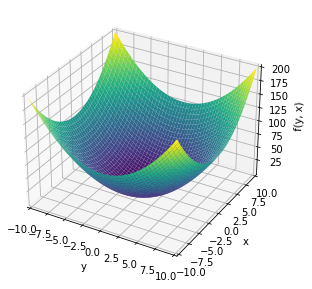

对应极小值： 0.0001
对x0求导，并计算x0=3,x1=4得到求导值： 6.00000000000378
对应极小值： 0.0001
对x1求导，并计算x0=3,x1=4得到求导值： 7.999999999999119


In [17]:
# 通过 sympy 求偏导数,可以看到，sympy是先求得偏导函数再进行相关参数带入计算，求得偏导
from sympy.plotting import *
from sympy import *
x,y=symbols("x,y")
exp=x**2+y**2
dif_x=diff(exp,x)
print("对x的偏导：")
print(dif_x)
dif_y=diff(exp,y)
print("对y的偏导：")
print(dif_y)
print("求x偏导在（3，4）值")
print(dif_x.evalf(subs={x:3,y:4}))
print("求y偏导在（3，4）值")
print(dif_y.evalf(subs={x:3,y:4}))
plot3d(exp)
# 通过numpy 求偏导
# numpy 求偏导比较粗暴，直接在定义函数中，将固定维度设为常数

def function_tmp1(x0):
    x1=4
    return x0**2+x1**2

def function_tmp2(x1):
    x0=3
    return x0**2+x1**2

if __name__=="__main__":
    x0=3
    x1=4
    print("对x0求导，并计算x0=3,x1=4得到求导值：",numerical_diff(function_tmp1,x0))
    print("对x1求导，并计算x0=3,x1=4得到求导值：",numerical_diff(function_tmp2,x1))




背景知识：
在引入梯度，以及通过梯度求得最优误差之前，需要以下背景知识：
* 全微分
> 之前的偏导数，都是设定在其他维度（自变量）为常数固定值例如$y=d$，时求函数$z=f(x,y)$在一求导变量与因变量构成平面，例如$zx$上的投影函数的导数。
> 即 $\frac{df(x,y)}{dx}=f$
> 但考虑如果所有的自变量都在改变，即$x+\Delta x,y+\Delta y$此时对应的$\ Delta z$，即函数的导数如何求得？
* 方向导数


# 梯度 方向导数 全微分 
深度学习中，与微分相关的概念包括微分、导数、一元微分、偏导数

首先从基础的概念入手，即微分与导数
微分$dy$与$\Delta y$有关联，但不等同其中

 $\Delta y=f(x_0+\Delta{x})-f(x_0)$ 是函数$y=f(x)$因为$x$增加了$\Delta{x}$增加的实际值

 而（其中 $dx$和$\Delta x$等同，就是$x$的微小增量
 $dy=\frac{\partial f(x_0)}{\partial x} \times dx$ 其中 $=\frac{\partial f(x)}{\partial x}$为经过$x_0$点与$f(x)$相切的切线斜率，即$tan \theta \times dx=dy$

 由此可见，严格来说 $\Delta y$与$dy$并不完全相等，但是当 $dx$很小的时候，$\Delta y \fallingdotseq dy$

 基于这一概念，函数$f(x)$的曲线也可以用各个$x$点对应的$\frac{\partial f(x)}{\partial x}$进行模拟得到。
 
---
### 全微分：
直接给出全微分的定义，即一个多元函数$z=f(x,y)$
给定$(x_0,y_0)$求增加$\Delta x,\Delta y$后$z$的增加，即
$\Delta z=f(x_0+\Delta x,y_0+\Delta y)-f(x_0,y_0)$

而$dz =\frac{\partial f(x_0)}{\partial x} dx + \frac{\partial f(y_0)}{\partial y} dy$

同样在 $dx,dy$很小时，$dz \fallingdotseq \Delta z$

这里主要讨论全微分的几何意义，$\frac{\partial f(x_0)}{\partial x} dx $ 分别对应在x轴上通过$tan \theta \times dx$得到在z轴的对应点$(x_0+\Delta x,z_0+d zx)$;$\frac{\partial f(y_0)}{\partial y} dy $ 分别对应在x轴上通过$tan \beta\times dy$得到在z轴的对应点$(y_0+\Delta x,z_0+d zy)$，基于向量概念，这两个点的和就指向$dz$所对应的点。




#### 方向导数的推导 
首先，明确方向导数的几何含义

首先，以二元函数为例，方向导数是在 $xy$二维空间的投影，是一个有方向大小的向量，即以$L(x_0,y_0)$整个点为起点，到$Le(x_0+dx,y_0+dy)$为终点的向量($l$,$x_0,y_0$不一定是原点可以是二维空间任意一点),该向量有大小与方向。同时其在$x$轴$y$轴的投影分别为$\Delta x,\Delta y$,其大小为$||l||$ 方向向量的模（norm）

于其他导数含义相同，方向导数是切线与函数$f$相切的斜率$tan \theta$

方向导数的斜率就是$x,y$空间中（先讨论二维空间 $z=f(x,y)$）向量$l$从$l_0(x_0,y_)$出发，指向$l_1(x_1,y_1)$点，其长度$l$也可表达为$\Delta l$
$$tan \theta= \frac{\Delta z}{\Delta l}$$

1. 首先设函数$z=f(x,y)$求微分$\Delta z$
$$\Delta z=f(x+\Delta x, y+\Delta y)-f(x,y) \cdots (1)$$
2. 二维平面x,y中，得到
$$  \left\{
\begin{aligned}
\Delta x=\Delta l \times cos\alpha \\
\Delta y=\Delta l \times sin\alpha \\
\end{aligned}
\right. \cdots (2)
$$
其中 $\alpha$为方向向量$l$与x轴的夹角

3. 方程(2)代入方程(1)，得到

$$\Delta z=f(x+\Delta l \times cos\alpha, y+\Delta l \times cos\alpha)-f(x,y) \cdots (3)$$

4. 此时方程（3）除$\Delta l$并求 $\Delta l \rightarrow 0$时极限，即求方向导数

$$\frac{d f(x,y)}{\ d l}={\lim_{\Delta l \to 0}}{\frac{f(x+\Delta l \times cos\alpha, y+\Delta l \times sin\alpha)-f(x,y)}{\Delta l}} \cdots (4)$$

5. 但是公式（4）依然很复杂，这时可以结合全微分进行简化，首先全微分为
$$df(x,y)=\frac{f(x,y)}{x} \times \Delta x+\frac{f(x,y)}{y} \times \Delta y \cdots (5)$$
又
$$  \left\{
\begin{aligned}
\Delta x=\Delta l \times cos\alpha \\
\Delta y=\Delta l \times sin\alpha \\
\end{aligned}
\right. \cdots (2)
$$
代入公式（5）
得到
$$df(x,y)=\frac{f(x,y)}{x} \times \Delta l \times cos\alpha+\frac{f(x,y)}{y} \times \Delta l \times sin\alpha \cdots (6)$$
公式(6)两边除 $d l$($\Delta l$等同 $d l$)，得到：
$$\frac {df(x,y)}{d l}=\frac{f(x,y)}{x} \times   cos\alpha+\frac{f(x,y)}{y} \times   sin\alpha \cdots (7)$$
6. 基于向量点乘定义，可以将公式(7)转化为两个向量(梯度向量与$l$单位向量)点成方式，最终求得方向导数：
$$\frac {df(x,y)}{d l}=\vec{(\frac{f(x,y)}{x}  , \frac{f(x,y)}{y})} . \vec{(cos\alpha, sin\alpha)} \cdots (8)$$

--- 
### 方向导数与梯度下降

首先给出方向导数的定义

方向导数即一个向量$l$，与$f$函数相切得到的切平面的导数。

$$\frac{\partial f}{\partial l}$$
结合梯度概念，方向导数可以表达为：

$$\frac{\partial f(x,y)}{\partial l}=(\frac{\partial f(x,y)}{\partial x},\frac{\partial f(x,y)}{\partial x}) \dot (cos \theta,sin \theta)$$
其中$\nabla f= (\frac{\partial f(x,y)}{\partial x},\frac{\partial f(x,y)}{\partial x}) $为梯度向量，即$f(x,y)$中各个自变量的偏导数，

$ e_l=(cos \theta,sin \theta)$为单位向量，代表方向导数对应在自变量空间投影的单位向量，其模$norm=\sqrt{cos{\theta}^2+sin{\theta}^2}=1 $

方向向量公式由可以表达为：

$$\frac{\partial f(x,y)}{\partial l}=\nabla{f} \cdot e_l $$

 

根据向量点积定义，$\vec{a} . \vec{b}=|a||b|cos \beta$即，向量a在向量上的投影模相乘。

根据以上定义，方向向量就可以表示为梯度向量的模与单位方向向量模乘积再乘两个向量夹角的cos
$$\frac{\partial f(x,y)}{\partial l}=|\nabla{f}| \times |e_l| \times cos\alpha $$
，又由于单位向量$e_l$的模为1，实际上就可以直接表示为
$$\frac{\partial f(x,y)}{\partial l}=|\nabla{f}| \times cos\alpha $$
当单位方向向量与梯度向量方向一致时候$\alpha =\pi/2,cos\alpha=1$该（点）方向导数最大，为梯度的模$|\nabla{f}|$，或者说该单位方向向量于$f(x,y)$切得切线斜率最大，函数**上升**最快

 









例如，一座山形如 $z=5-x^2-2y^2$登山者位于$M(x=-\frac{3}{2},y=-1,z=\frac{3}{4})$处，求登山者选择最陡峭的登山方向并求出坡度。

实际就是求在点$M$处的方向向量，该方向向量的方向导数最大$tan\theta$最大。

根据方向导数定义，得到当方向向量与该点的梯度方向一致时，方向导数最大，图像最陡峭，即求$\nabla f(x,y)_{x=3/2,y=-1}$

得到

首先基于sympy求方向导数、梯度

首先画出山的图像：


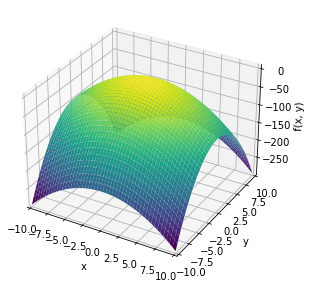

对y的偏导：
-4*y
对x的偏导：
-2*x
梯度向量函数为：( -2*x , -4*y )
点M（1.5,-1,3/4)，对应的最陡峭方向（x，y平面）为 [-3.  4.]
得到梯度向量的模： [-3.  4.]
求方向导数=|梯度模||单位方向向量模|*cosbeta,其中陡峭方向beta对应90°，cos90°=1，单位方向向量模=1
得到方向导数(tan(theta))= 5.0


In [7]:
from sympy.plotting import *
from sympy import *
import numpy as np 

if __name__=="__main__":
    print("首先画出山的图像：")
    x,y=symbols("x,y")
    exp=5-x**2-2*(y**2)
    plot3d(exp)
    dif_y=diff(exp,y)
    print("对y的偏导：")
    print(dif_y)
    dif_x=diff(exp,x)
    print("对x的偏导：")
    print(dif_x)    
    print("梯度向量函数为：(",dif_x,",",dif_y,")")
    dif_x_vlaue=dif_x.evalf(subs={x:1.5,y:-1})
    dif_y_vlaue=dif_y.evalf(subs={x:1.5,y:-1})
    nabla=np.array([dif_x_vlaue,dif_y_vlaue])
    nabla=nabla.astype("float")#sympy结果对应的是Float是object，需要转换为flot才能在numpy中计算
    print("点M（1.5,-1,3/4)，对应的最陡峭方向（x，y平面）为",nabla)
    norm=np.linalg.norm(nabla)
    print("得到梯度向量的模：",nabla)
    print("求方向导数=|梯度模||单位方向向量模|*cosbeta,其中陡峭方向beta对应90°，cos90°=1，单位方向向量模=1")
    print("得到方向导数(tan(theta))=",norm)
    
    

例：$f(x,y,z)=ln(x^2+y^2+z^2)$求f在点$M_1(1,1,1)$处沿着$M_2(2,3,3)$的方向导数
1. 首先求得$\vec{l}$方向向量$\vec{l}=M_2-M_1$
2. 根据方向导数得公式 $\frac{df(x,y,z)}{dl}=\nabla f(x,y) . e_l$，其中$e_l$是方向向量得单位向量，故需要将$\vec{l}$单位化$e_l=\frac{l}{|l|}$

In [24]:
from sympy.plotting import *
from sympy import *
import numpy as np 

if __name__=="__main__":
    x,y,z=symbols("x,y,z")
    exp=ln(x**2+y**2+z**2)
    M1=np.array([1,1,1])
    M2=np.array([2,3,3])
    l=M2-M1
    print("方向向量：",l)
    e_l=l/np.linalg.norm(l)
    print("将方向向量单位化：",e_l)
    diff_x=diff(exp,x)
    diff_y=diff(exp,y)
    diff_z=diff(exp,z)
    print("方程对应梯度向量公式(",diff_x,diff_y,diff_z,")")
    print(M1[0])
    M1_nabla_x=diff_x.evalf(subs={x:M1[0],y:M1[1],z:M1[2]})
    M1_nabla_y=diff_y.evalf(subs={x:M1[0],y:M1[1],z:M1[2]})
    M1_nabla_z=diff_y.evalf(subs={x:M1[0],y:M1[1],z:M1[2]})
    M1_nabla=np.array([M1_nabla_x,M1_nabla_y,M1_nabla_z])
    M1_nabla=M1_nabla.astype(float)
    print("求得M1点梯度：",M1_nabla)
    df_dl=M1_nabla@e_l
    print("方向导数=梯度向量@单位方向向量=",df_dl)
    print("可以解释为，t=f(x,y,z)函数沿着l方向向量方向前进一个单位(e_l)，那么t将增加1.111个单位(e_l)")
    

方向向量： [1 2 2]
将方向向量单位化： [0.33333333 0.66666667 0.66666667]
方程对应梯度向量公式( 2*x/(x**2 + y**2 + z**2) 2*y/(x**2 + y**2 + z**2) 2*z/(x**2 + y**2 + z**2) )
1
求得M1点梯度： [0.66666667 0.66666667 0.66666667]
方向导数=梯度向量@单位方向向量= 1.1111111111111112


#### 梯度下降(上升）法 
在梯度的概念基础上，求函数（深度学习中求误差函数）的极大值，注意以下要点

* 函数$f$ 变化的方向与其梯度向量相同，并且变化一个单位的最大值就为梯度向量模
 

* 不同于人类通过公式基于解析性计算导数方式，计算机采用的是数值微分，是基于微小值不断求导。

 

首先基于numpy而不是sympy求函数梯度（偏导数向量）

该函数基于之前单个变量导数基础上扩展，

之前导数函数输入一个标量，计算导数。扩展后，偏导函数输入一个向量，每个向量值对应一个变量，形如 [x,y,z]

```python
def numerical_diff(f,x):
    """_summary_
    Args:
        f (_type_): _待求导函数公式_
        x (_type_): _对应x0点值_
    Returns:
        _type_: _description_
    """
    delta=1e-4
    print("对应极小值：",delta)
    lim_rs=(f(x+delta)-f(x-delta))/(2*delta)
    
    return lim_rs
```

In [2]:
import numpy as np 

def numerical_gradient(f,x_s):
    """_summary_

    Args:
        f (str): _description_
        x_s (np.array): _description_

    Returns:
        np.array: _description_
    """
    delta=1e-4
    print(delta)
    d_x=np.zeros_like(x_s)# 定义偏导数结果向量
    #对每一个自变量向量中自变量进行求导，并放入偏导数结果向量中
    for i in range(x_s.size):
        #根据计算公式，在此，x_s[i]对应自变量发生了改变（增加微小值），但其他自变量不变，带入方程求解的结果
        # f(x_s[x+detla,y,z]-f(x,y,z))
        origial_x=x_s[i]#保留原始的x_s[i]值
       
        x_s[i]=origial_x+delta
        #print("x+delta:",x_s[i])
        r1=f(x_s)
        #print("f(x+delta,y)计算结果：",r1)
      
        x_s[i]=origial_x-delta
        print("x-delta:",x_s[i])
        r2=f(x_s)
        #print("f(x-delta,y)计算结果：",r2)
        
        d_x[i]=(r1-r2)/(2*delta)
        x_s[i]=origial_x#还原 x_s[i]
        #print("f1-f2/h计算结果",d_x[i])
        
    return d_x
def numerical_gradient2(f,x):
    h=1e-4
    print(h)
    grad=np.zeros_like(x)
    for idx in range(x.size):
        tmp_val=x[idx]
        
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    return grad 
        
    
    
def function_2(x):
    return x[0]**2+x[1]**2
 
if __name__=="__main__":
     xs=np.array([0,0])
     xs1=np.array([1,1])
     xs2=np.array([2,2])
     df=numerical_gradient(function_2,xs)
     df1=numerical_gradient(function_2,xs1)
     df2=numerical_gradient(function_2,xs2)
     print(df)
     print(np.linalg.norm(df))
     print(df1)
     print(np.linalg.norm(df1))
     print(df2)
     print(np.linalg.norm(df2))
          
 
        
 
        

0.0001
0.0001
0.0001
[0 0]
0.0
[5000 5000]
7071.067811865475
[15000 15000]
21213.203435596424


深度学习或回归拟合中，就是找到误差函数的最快下降方向，一般情况下梯度方向是函数最快上升方向，那么在求最小下降方向时候，方向向量方向和梯度向量方向求相反方向($cos\ \pi$)即可。

但是，就如一元函数求$f'(x_1)=0$只能说明在$x1$函数切线与函数平行，可能是函数某个坡度的最小或最大值。

梯度表示的是各点函数值减少的最多的方向，因此无法保证梯度所指的方向就是函数的（整体）最小值或真正应该前进的方向。实际上在复杂的函数中，（负）梯度所值方向基本上都不是函数最小值。

> 函数的极小值、最小值以及被称为鞍点（saddle point）的地方，**梯度为0**。

> 极小值是局部最小值，也就是限定在某个范围内的最小值。

> 鞍点是从某个方向看是极大值，从另外一个方向看则是极小值的店。

虽然梯度法是要寻找梯度为0的地方，但是那个地方不一定就是整体（误差）函数极小值（也有可能是极小值或鞍点），此外，当函数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，陷入被称为“学习高原”的无法前进的停滞期。


设一个$z=f(x,y)$二元函数，例如 
$$z=x^2+y^2$$

0. 首先考虑梯度上升法，通过三次向梯度向量方向增加求函数最大值

1. 设$xy_0=(x=x_0,y=y_0)$为函数起始值例如 (6,6) 则为二维空间中一个点

2. 基于方向导数性质，函数$f(x,y)$上升最快方向，就是和其梯度一致方向。函数梯度向量为：
$$\nabla f(x,y)=(2x,2y)$$
带入$x_0=0,y_0=0$得到$xy_0$点的梯度向量
$$\nabla f(x,y)=(12,12)$$

3. 从$xy_0$点出发，沿着改点梯度(6,6)的方向，前进
$$xy_1(x_1,y_1)=xy_0+\nabla f(0,0) \rightarrow (6,6)+(18,18)=24,24$$
> 在此由于梯度向量的模可能过大，使得其错过了极小值点（x_m,y_m)，为此可以设置一个常数项——学习率(learning rate) $\mu$,其一般是个较小值，与梯度相乘，得到步长（step-size） 

$$step size=\mu \times \nabla f(x,y)$$


4. 到达$xy_1$点后，再求该点的梯度$\nabla f(24,24)$,并与$xy_1$相加，得到向梯度方向，即函数$f(x,y)$最大方向点$xy_2$。
$$xy_2(x_2,y_2)=xy_1+\nabla f(x_1,y_1)$$
$$xy_2(x_2,y_2)=(24,24)+(46,46)$$

5. 设到此为止，得到3次向梯度向量方向得到的函数$z=f(x,y)$的极大值（注意不一定是最大值）

> 注意到步长=学习率*梯度向量，作为 **超参数** 是人为确定的固定值，但由于不同（更新）点的梯度向量不同，特别是模大小不同，所以步长也在不断变化，在一些地方可以通过将梯度向量单位化即
 $$e_g=\frac{\nabla f(x,y)}{|\nabla f(x,y)|}$$
 $$step size=\mu \times e_g$$
 此时每次变化的步长大小（模）是固定的，取决于学习率，当然步长方向还是不断改变，指向梯度方向。

In [ ]:
# 基于sympy求梯度上升(下降）法

from sympy.plotting import *
from sympy import *
import numpy as np 

if __name__=="__main__":
    x,y,z=symbols("x,y,z")
    exp=x**2+y**2
    plot3d(exp)
    diff_x=diff(exp,x)
    diff_y=diff(exp,y)
    print("梯度向量函数:(",diff_x,diff_y,")")
    n=1000# 循环次数
    f_xy=np.zeros(n)
    xy_0=np.array([6,6])# 起始点
    point=np.zeros((n,2))
    mu=1e-2# 学习率
    for i in range(n):
        if i >0 :
            xy_0=point[i-1,:]
        # 求x0点梯度
        dx0_df=diff_x.evalf(subs={x:xy_0[0],y:xy_0[1]})
        dy0_df=diff_y.evalf(subs={x:xy_0[0],y:xy_0[1]})
        nabla1=np.array([dx0_df,dy0_df])
        print("第1次,根据梯度方向更新x,y取值，向最大化方向前进,方向导数为：",nabla1)
        xy_1=xy_0-mu*nabla1.astype(float)
        print("新的点xy1:",xy_1)
        point[i,:]=xy_1
        f_xy[i]=exp.evalf(subs={x:xy_1[0],y:xy_1[1]})
        print("更新点对应的f(x,y)=z，z值为：",f_xy[i])
        print(f_xy[i])
    print("最终通过三次循环得到极小值对应点，可以发现由于梯度对应的模过大，已经超过了最小点：")
    point
    
    

关于梯度法空间讨论

对梯度法空间讨论主要集中于其自变量空间中向量更新

例如$z=f(x,y)$二维向量，基于以上例子在空间中



向量相加结果： [2 0]


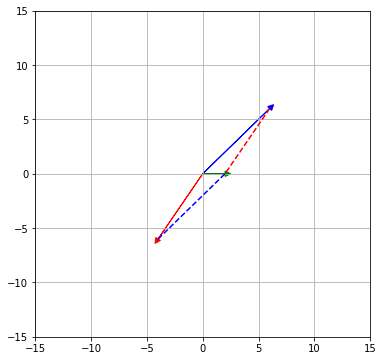

In [38]:
import matplotlib.pyplot as plt 
import numpy as np 
 
fig,axes=plt.subplots()
fig.set_size_inches(6,6)
xy0=np.array([6,6])#起始点
nabla1=-np.array([4,6])#（负）梯度向量
mu=1e-2#学习率
axes.set_xlim(-15,15)
axes.set_ylim(-15,15)
axes.arrow(0,0,xy0[0],xy0[1],head_length=0.5,head_width=0.5,color='blue')# 起始点
axes.arrow(0,0,nabla1[0],nabla1[1],head_length=0.5,head_width=0.5,color='red') # 起始点对应梯度向量
axes.grid()
#axes.plot([xy1[0],xy1[0]],[xy1[1],xy1[1]],'--')
#axes.plot([nabla1[0],z[0]],[s[1],z[1]],'--')
#xy1=xy0+mu*nabla1# 通过与步长相乘，调整新向量更新的长度（模），但方向不变
xy1=xy0+1*nabla1
print("向量相加结果：",xy1)
axes.arrow(0,0,xy1[0],xy1[1],head_length=0.5,head_width=0.5,color='green')
axes.plot([xy0[0],xy1[0]],[xy0[1],xy1[1]],'--',color='red')
axes.plot([nabla1[0],xy1[0]],[nabla1[1],xy1[1]],'--',color='blue')
 
 
 
 
plt.show()

由图可以看出原向量xy0（蓝色），与 **负** 的梯度向量相加，相当于顺着与地图向量**平行**的方向移动了到新的点xy1，此时候，梯度向量的模对移动点的距离产生影响，

梯度向量模越大，原向量移动距离（对应新的向量模）就越大。



#### 基于梯度下降法，实现回归函数的最优化问题


从数学上来说，确定神经网络的参数是一个最优化的问题，具体就是对神经网络的参数（权重和偏置）进行拟合，使得神经网络输出与实际数据相吻合。

不论复杂的神经网络，抑或简单回归，都可以用梯度下降法求解。

例如简单的一元回归，

$$y=a\times x +b$$

1. 根据f(x)函数，以及测试集，带入方程求得误差
MSE（均方误差）（Mean Square Error）
 $$e=\frac{1}{n} \sum_{i=1}{ {(y'-y)^2}}$$
 其中 $y$ 为测试集实际值，$y'$为对应测试集中x值对应计算得到函数值，即$y'=a*x+b$
 
 得到
$$f_e=\frac{1}{n} \sum_{i=1}^n{ {((w*x_i+b)-y_i)^2}}$$

在此$x_i,y_i$是一系列的已知常数（$n$个测试集对）。 
 

3. 回归你和的模板就是使得$f_e$达到极小值，如果使用梯度下降法，则需要同不断地调整$w,b$来找到最小值：

以下方便起见只讨论$w$ 权参
>
* 首先给定一个$w_0$点（向量）
* 根据方向向量定义，求得梯度$\nabla f_e$ 梯度（负）方向即$f_e$误差函数对$w$偏导。
* 更新 $w_1=w_0-\mu \times \nabla f_e$ 其中$\mu$为学习率
* 循环直到 $f_e$得到最小值（或者指定循环$l$次）

In [ ]:
import numpy as np 


 


def numerical_gradient(f,x_s):
    """梯度求解
    注意，使用的是数值微分法，是基于微小值不断求导。即基于最原始的 df/dx=lim (f(x+h)-f(x-h))/h h->0 的形式
    Args:
        f (str): 所要求梯度的函数
        x_s (np.array): 计算梯度点的向量例如 M(x=0,y=0)

    Returns:
        np.array: M点对应函数f的梯度值
    """
    delta=1e-4
    print(delta)
    d_x=np.zeros_like(x_s)# 定义偏导数结果向量
    #对每一个自变量向量中自变量进行求导，并放入偏导数结果向量中
    for i in range(x_s.size):
        #根据计算公式，在此，x_s[i]对应自变量发生了改变（增加微小值），但其他自变量不变，带入方程求解的结果
        # f(x_s[x+detla,y,z]-f(x,y,z))
        origial_x=x_s[i]#保留原始的x_s[i]值
       
        x_s[i]=origial_x+delta
        #print("x+delta:",x_s[i])
        r1=f(x_s)
        #print("f(x+delta,y)计算结果：",r1)
      
        x_s[i]=origial_x-delta
        print("x-delta:",x_s[i])
        r2=f(x_s)
        #print("f(x-delta,y)计算结果：",r2)
        
        d_x[i]=(r1-r2)/(2*delta)
        x_s[i]=origial_x#还原 x_s[i]
        #print("f1-f2/h计算结果",d_x[i])
        
    return d_x

 
def mean_sqared_e(w_s):
    """均方误差函数,在此为了实现numpy数组，对对应的训练集进行处理，
     损失函数的确定是通过测试集与初始的权参实现
    Args:
        y (_type_): 真值
        y_p (_type_):预测值
        w:偏参
    Returns:
        _type_: _description_
    """
    x_train=np.array([3,4,6,5,1,4,3,4,3.5,4.5,2.5])
    y_train=np.array([1,2,3,2.5,1,2,2,2,1.5,3,1.3])
    
    n=x_train.size
    x=x_train.reshape(n,1)
    y=y_train.reshape(n,1)
    w=w_s.reshape(1,1)
    e_in=y-x@w
    e=(np.sum((e_in)**2))/2
    return e
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    """梯度下降法

    Args:
        f (_type_): 误差函数
        init_x (_type_): 权重初始值
        lr (float, optional): 学习率.
        step_num (int, optional): 循环次数. Defaults to 100.

    Returns:
        _type_: 更新后的新权重，实现误差函数达到极小值
    """
    x=init_x
    for i in range(step_num):
        grad=numerical_gradient(f,x)
        x=x-lr*grad
    return x 
if __name__=="__main__":

     
    w_s=np.array([2])# 权参的随机起始值
    #grad=numerical_gradient(mean_sqared_e,w_s)
    x_train=np.array([3,4,6,5,1,4,3,4,3.5,4.5,2.5,8])
    y_train=np.array([1,2,3,2.5,1,2,2,2,1.5,3,1.3,9])
    (2*x_train-y_train)+(3*x_train-y_train)
    print(w_s.ndim)
    print(x_train.ndim)
    w=np.size(x_train,axis=0)
    #print(w_s.reshape(2,1))
    #print(x_train.reshape(12,1))
    #print(x_train.reshape(12,1)@w_s.reshape(1,1)-y_train.reshape(12,1))
    e=mean_sqared_e(w_s)
    print(e)
    grad=numerical_gradient(mean_sqared_e,w_s)
    print(grad)
    w_new=gradient_descent(mean_sqared_e,w_s,0.001,100)
    print(w_new)
    



#### 神经网络梯度
与回归相同，神经网络也通过梯度来优化方程，此处梯度对应的是权参、偏参构成的误差函数（或称损失函数）





----


In [8]:
#import myfucntion.gradient as mg
#import myfucntion.Function as mf
#import common.functions as f 
#from importlib import reload
#import common.gradient as gt

#reload(f)
#reload(mg)
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient
import numpy as np 
from myfucntion import gradient as mg
from importlib import reload
reload(mg)
 
class SimpleNet:
    def __init__(self):
        self.W=np.random.randn(2,3)#初始化一个权重矩阵，作为求梯度的初始多维向量
    
    def forword(self,x):
        A=x@self.W 
        return A
    
    def loss(self,x,y):
        a=self.forword(x)
        y_p=softmax(a)
        loss=cross_entropy_error(y_p,y)
        return loss ,y_p
    
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):#损失函数L
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss   


if __name__=="__main__":
    simpleNet=SimpleNet()
    print("初始权重W_old：",simpleNet.W)
    #x=np.array([2,3]).reshape(1,2)
    x=np.array([0.6,0.9])
    y=np.array([0,1,0])
    print("真实值y_train",y)
    print("真实值对应数字：",np.argmax(y))
    A=simpleNet.forword(x)
    loss,y_p=simpleNet.loss(x,y)
    print("经过初始权参与X点积得到网络输入点值：",A)
    print("输入点形状",A.shape)
    print("经过激活函数softmax得到结果",y_p)
    print("经过激活函数softmax得到结果形状",y_p.shape)
    print("得到概率最大的那个预测数字：",np.argmax(y_p))
    print("误差值：",loss)
    # 基于前代码，这里的f(W)中W其实并没有起到作用，因为初始的W在__init__方法中已经生成，这里这是W是一个伪参数
    def f(W):
        loss,y_p=simpleNet.loss(x,y)
        return loss
    dw=numerical_gradient(f,simpleNet.W)

    print("一次梯度下降后梯度向量，各个值为各权参对应偏导数：",dw)
    w_new=mg.gradient_descent(f,simpleNet.W)
    print("经过梯度下降法得到的新的权参W_new:",w_new)
    
    

初始权重： [[ 0.94988364  1.46592983 -1.32950342]
 [-0.00235879 -1.1279907  -0.22443244]]
真实值 [0 1 0]
真实值对应数字： 1
经过初始权参与X点积得到网络输入点值： [ 0.56780727 -0.13563373 -0.99969124]
输入点形状 (3,)
经过激活函数softmax得到结果 [0.58704541 0.29051673 0.12243786]
经过激活函数softmax得到结果形状 (3,)
得到概率最大的那个预测数字： 0
误差值： 1.2360937650969104
一次梯度下降后梯度向量，各个值为各权参对应偏导数： [[ 0.35222712 -0.42568981  0.07346269]
 [ 0.52834068 -0.63853472  0.11019404]]
经过梯度下降法得到的新的权参W_new: [[ 0.94636137  1.47018673 -1.33023804]
 [-0.0076422  -1.12160535 -0.22553438]]


以上运算得到一层神经网络运算prect(W,x_train))后，得到损失函数loss(predict(W_old,x_train),y_train))在W_old向量点上，对应的梯度，即W权参矩阵各个点对应的偏导数。
例如其中

* $\frac{ \partial L }{ \partial w_{11} }=0.069$ 表示如果在其他$w_{12},w_{13}...,w_{nm}$固定情况下$w_{11}$增加$h$(极小值，这里设置的为$0.001$)，那么损失函数就将增加$\frac{\partial L}{\partial w_{11}} \times h =0.069\times 0.001$
* $\frac{ \partial L }{ \partial w_{12} }=-0.28805$ 表示如果在其他$w_{11},w_{13}...,w_{nm}$固定情况下$w_{12}$增加$h$(极小值，这里设置的为$0.001$)，那么损失函数就将减少$\frac{\partial L}{\partial w_{12}} \times h =-0.28805\times 0.001$

故此，从减少损失函数角度看，$w_{11}$应该向其$\frac{ \partial L }{ \partial w_{11} }$偏导数负方向更新，$w_12$应该向其$\frac{ \partial L }{ \partial w_{12} }$偏导数正方向更新，通过更新对误差函数$L$影响程度，$w_{12}$比$w_{11}$的贡献大

实现二层神经网络，并对Minist数据集进行分类，以下几个要点

1. 首先必须设置初始两层$W^{(1)},W^{(2)}$权参，设置为一个随机矩阵，但是其大小必须与输入层大小、隐藏层，以及输出层大小对应，以实现点积操作。

2. 输入的图片需要扁平化，以使得输入的是一个向量。

3. 内部激活函数使用sofmax，输出层使用 进行分类

4. 网络类包含的方法包括：
* __init__ 实现权参，偏参的初始化
* forward() 实现向前传播
* loss() 计算损失函数
* numerical_gradient 返回权参、偏参梯度


In [10]:
import numpy as np 
import common.gradient as g
import myfucntion.Function as mf
import common.functions as f
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        # 定义随机权参、偏参
        self.params ={}
        self.params["W1"]=np.random.randn(input_size,hidden_size)
        self.params["B1"]=np.zeros(hidden_size)
        self.params["W2"]=np.random.randn(hidden_size,output_size)
        self.params["B2"]=np.zeros(output_size)
 
    def forward(self,x):#predict
        A1=x@self.params["W1"]+self.params["B1"]
        Z1=f.sigmoid(A1)
        A2=Z1@self.params["W2"]+self.params["B2"]
        y_p=f.softmax(A2)
        return y_p
    
    def loss(self,x,y):
        y_p=self.forward(x)  
        loss=mf.cross_entropy_e(y_p,y)
        return loss
    
    def total_numerical_gradient(self,x,y):
        grad={}
        loss_W=lambda W: self.loss(x,y)
        
        grad['W1']=g.numerical_gradient(loss_W,self.params["W1"])
        grad['W2']=g.numerical_gradient(loss_W,self.params["W2"])
        grad['B1']=g.numerical_gradient(loss_W,self.params["B1"])
        grad['B2']=g.numerical_gradient(loss_W,self.params["B2"])
        return grad
    def accuray(self,x,y):
        """计算识别精度

        Args:
            x (_np.array_): _x测试集x.shape[0]代表输入训练的图像张数_
            y (_type_): _y真值（训练集）_

        Returns:
            _float_: _准确率_
        """
        y_p=self.forward(x)
        y_p=np.argmax(y_p,axis=1)
        y=np.argmax(y,axis=1)
        acc=np.sum(y_p==y)/float(x.shape[0])
        return acc
 
if __name__=="__main__":
    #测试1：输入12张26*26的图片（随机值
    x_train=np.random.rand(12,26*26) 
    y_train=np.random.rand(1,10)
    two_Net=TwoLayerNet(input_size=x_train.shape[1],hidden_size=20,output_size=10)
    y_predict=two_Net.forward(x=x_train)
    #print(y_predict)
    grad=two_Net.total_numerical_gradient(x_train,y_train)
    print(two_Net.params['W1'].shape)
    print(grad['W1'].shape)
    acc=two_Net.accuray(x_train,y_train)
    print("模型准确率为：",acc)
    

(676, 20)
(676, 20)
模型准确率为： 0.4166666666666667


在构建了二层神经网络的基础上，结合mini-batch方法即从总体训练集中随机抽球$n$个数据，而非一次性全部载入训练集。将神经网络的学习分为4个步骤

1. step1 mini-batch
>从训练数据集中随机抽取一部分数据，这部分数据称为mini-batch。我们的目标是减少mini-batch的损失函数（权参、偏参的函数）。

2. 计算梯度
>为了减少mini-batch的损失函数值，需要求出各个权重参数的梯度向量，负数梯度向量表示损失函数的值减少最多的方向。

3. 更新梯度
> 将权重参数沿着（学习率*梯度负方向）进行微小更新

4. 重复
重复步骤1、步骤2、步骤3

<font color='red'>这里第一步使用的数据是从训练集中随机选择的mini-batch数据，故又称为***随机梯度下降法（stochastic gradient descent）***</font>
在很多深度学习框架中，随机梯度下降法由一个名为SGD的函数实现。

---
以下在定义的二层神经网络基础上，完整实现对minist数据的分类，以及指定梯度下降循环$n$次过程中，损失函数的变化图像。

神经网络学习中，必须避免过拟合现象，也就是能识别训练数据以外的其他数据。

模型必须掌握泛化能力。故在进行神经网络学习过程中，会定期对训练数据和测试数据分别识别精度。

经过一个epoch都对记录训练数据和测试数据的识别精度

> **epoch** 是一个单位，一个epoch表示学习中**所有**训练数据均被使用过一次时的更新次数
> 例如60000个数据，一个mini-batch是100个，那么需要60次才能使用所有的数据，那么600次就是一个epoch

In [ ]:
import load_data as l

if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True)

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]


    ## 超参
    learning_rate=0.09#学习率
    batch_size=1000# 每批次随机选取100张图像
    iters_num=100#梯度下降迭代次数
    #构建网络实例
    network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        print("第",i,"次梯度下降")
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
        
        grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        #for param in ("W1","W2","B1","B2"):
            #network.params[param]=two_Net.params[param]-learning_rate*grad[param]
        for key in ('W1', 'B1', 'W2', 'B2'):
             network.params[key] =network.params[key]- learning_rate * grad[key]
        #print(network.params['W1'].shape)
        #print(grad['W1'].shape)
        #print(network.params['W2'].shape)
        #print(grad['W2'].shape)
        loss=network.loss(x_batch,t_batch)
        train_loss_list.append(loss)
        if i%10==0:
            train_acc=network.accuray(x_train,t_train)
            train_acc_list.append(train_acc)
            test_acc=network.accuray(x_test,t_test)
            test_acc_list.append(test_acc)
            print(i,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)

        
    


### 反向传播 backpropagtion
> "从左向右进行计算"是一种正方向上的传播，简称正向传播（forward propagation）。正向传播是计算图出发点导结束点的传播。反向传播（backward propagation）就是从右到左的反方向计算传播。

之前梯度下降中，使用数值微分法求$W$权参、$B$偏参的梯度向量，即基于导数的最原始表达
$$\frac{\partial f(x)}{\partial x}=lim_{h \rightarrow 0}{\frac{f(x+h)-f(x)}{h}}$$
但由于神经网络中参数巨大，包括每一层的权参与偏参和，计算量非常巨大，显然必须使用更有效的方法来计算梯度。

在此使用反向传播解决这一问题

反向传播使用，只是替换深度学习中梯度下降中所使用的数值微分方法，提高其效率 

反向传播的数学原理是链式求导。
------
反向传播求导实际是对每一个权参，偏参求偏导过程，即
$$\frac{\partial C}{\partial w_{ij}^n}$$
其中 $C$为神经网络的整体误差函数，$w_{ij}^n$为$n$层神经网络中，由$n-1$层$i$节点指向$n$层$j$节点的权参

根据链式法则(chain)
$$\frac{\partial C}{\partial w_{ij}^n}=\frac{\partial z_j}{\partial w_{ij}^n} \times \frac{\partial C}{\partial z_j}$$
其由两个部分组成，其中$z_j$为$j-1$层各个节点输出值$a$与权参相乘与偏参相加。
例如
$$z_3=w_{23}*a_2+w_{13}*a_1$$

故误差函数对权参的偏导数可以分为两个部分
1. forward pass
$$\frac{\partial z_j}{\partial w_{ij}^n} $$
2. backward pass
$$\frac{\partial C}{\partial z_j}$$
通过这两个部分相乘就可以得到相关权参的偏导

<img src="https://pic2.zhimg.com/v2-42c972facbfb9fbf8b1a71bb977c00b1_r.jpg" width="50%" height="50%">


#### 1.forward pass $\frac{\partial z_j}{\partial w_{ij}^n} $
> forward pass 是网络中最先执行的部分，backward pass 再执行

forward pass相对简单，因为根据$z_3=w_{23}*a_2+w_{13}*a_1$ 定义，若求其中$w_{23}$偏导，就直接为$a_2$

总结得到权参$w_{ij}^{(n)}$的forward pass等于$a_i^{(n-1)}$即上一层与改权参对应的输入值（input）。这个$a_i^{(n-1)}$就是$n-1$层$i$结点激活函数输出值。

<img src="https://pic1.zhimg.com/v2-85d1a38b6eefd6098eb0e8021b4e3e80_r.jpg" width="50%" height="50%">

#### 2. backword pass

backword pass 即求 $\frac{\partial C}{\partial z_j}$

一下假设一个简单网络结构求

<img src="https://pic4.zhimg.com/v2-571feaeb7b95f5ce3b03ffd3c8c2a363_b.jpg" width="60%" height="60%">

求解步骤：

1. 根据神经网络激活函数定义，图中

$$a=\sigma (z)  \cdots (1)$$
根据链式法则对$z$的求导可以结合(1)方程得到，即
$$\frac{\partial C}{\partial z}=\frac{\partial a}{\partial z} \frac{\partial C}{\partial a} \dots (2)$$

2. 首先讨论式(2)中$\frac{\partial a}{\partial z}$
这里假设$\sigma$选取sigma函数作为激活函数，即$\sigma(z)=\frac{1}{1+e^{-z}}$，

sigma函数导数有个很好的特性$\sigma'(z)=\sigma(z)(1-\sigma(z))$
在这里$z$是一个常数，在forward 计算中就已经确定（可以理解为在给定了X_train、初始随机W、B权参、偏参后，z第第一轮值可以确定）

故$\frac{\partial a}{\partial z}=const$实际是一个常数

3. 讨论式(2)中$\frac{\partial C}{\partial a}$

这里假设$a$为第$n$层网络的第$i$个节点输出(output)，即$a_i^{(n)}$

该输出与对应的权参相乘后，对应到$z_j^{(n+1)},z_m^{(n+1)}$两个节点

$$
\left\{
\begin{aligned}
z_j^{(n+1)}=a_i^{(n)}\times w_{ij}^{(n)}+.... \\
z_m^{(n+1)}=a_i^{(n)}\times w_{im}^{(n)}+.... \\
\end{aligned} 
\cdots (3)
\right.
$$
根据链式法则，
$$\frac{\partial C}{\partial a_i^{(n)}}=\frac{\partial z_j^{(n+1)}}{\partial a_i^{(n)}} \frac{\partial C}{\partial z_j^{(n+1)}} + \frac{\partial z_m^{(n+1)}}{\partial a_i^{(n)}} \frac{\partial C}{\partial z_m^{(n+1)}} \cdots (4) $$ 
结合方程式（3），得到其中：
$$
\left\{
\begin{aligned}
\frac{\partial z_j^{(n+1)}}{\partial a_i^{(n)}}=w_{ij}^{(n)} \\
\frac{\partial z_m^{(n+1)}}{\partial a_i^{(n)}}=w_{im}^{(n)} \\
\end{aligned} 
\cdots (5)
\right.
$$

3. 结合以上公式， 

$$\frac{\partial C}{\partial z_i}=\sigma'(z_i)[w_{ij}^{(n)}\frac{\partial C}{\partial z_j^{(n+1)}}+w_{im}^{(n)}\frac{\partial C}{\partial z_m^{(n+1)}}] \cdots (6)$$
其中$z_i,w_{ij},w_{im}$的初始值通过前向计算（即forward(x_train)或predict）可以得到，所以在该论计算中都可视为常量。故公式(5)变为讨论
$$\frac{\partial C}{\partial z_j^{(n+1)}},\frac{\partial C}{\partial z_m^{(n+1)}}$$


4. 构建反向的神经网络，求解$\frac{\partial C}{\partial z_j^{(n+1)}},\frac{\partial C}{\partial z_m^{(n+1)}}$，由于该方程很难求解，以下换个思路，从最终的网络结果节点反向推出。

---

4.1  backward pass 的前提是已经运行过一次forward pass，也就是通过输入X_train,以及初始的（随机）W权参，B偏参，可以计算整个网络中所有的Z（加权输入值），A（节点激活函数输出值），以上数据将作为back ward 输入值。

---
4.2总结公式（6），层n的$\frac{\partial C}{\partial z_{j}^n}$就是与其关联的下一次节点输入值$z$与对应权参$w$和，而这一组合可以不断推导，直到输出层。
可以反向构建一个网络，这个网络中，输入的是各个（反向）节点的$\frac{\partial C}{\partial z}$通过式（6）的运算，得到下一层（对应正向网络的上一层）$\frac{\partial C}{\partial z}$。

注意这里${\partial a_i^{(n)}}$由于已经运行过forward pass，故$a_i$已求得${\partial a_i^{(n)}}$同样也是一个常数。
相关图像：

<img src="figs\backwardpass.jpg" height="50%" width="50%">

---

 4.3 根据4.2设计的反向网络，开始对整个网络进行反向推导，以求得$\frac{\partial C}{\partial z}$,

<img src="figs\backwardpass1.jpg" height="50%" width="50%">

此时考虑整个反向网络中两种情况：
* case 1：
网络已经是输出层，对应了测试集结果Y_train的y1,y2，求图中的$\frac{\partial C}{\partial z'}$,$\frac{\partial C}{\partial z''}$ <font color='red'>注意这里z',z''上'是标识而不是导数</font>

设这里输出层激活函数使用了softmax函数，损失函数$C$使用了交叉熵误差函数（实际上，使用哪个函数不重要）
$$
\left\{
\begin{aligned}
y_1=softmax(z') \\
y_2=softmax(z'') \\
\end{aligned} 
 
\right.\cdots (7)
$$
通过链式法则求导得到：
$$
\left\{
\begin{aligned}
 \frac{\partial C}{\partial z'}=\frac{\partial softmax}{\partial z'}\frac{\partial C}{\partial y_1}\\

\frac{\partial C}{\partial z''}=\frac{\partial softmax}{\partial z''}\frac{\partial C}{\partial y_2}\\
\end{aligned}
\right. \cdots (8)
$$
其中$z',y_1$已知;其中$z'',y_2$已知

此时可以结合forward pass（已经先期运行过）求输出层对应的权参偏导，例如

$$\frac{\partial C}{\partial w_3}=forword(w_3)backward(w_3)=\frac{\partial z'}{\partial w_3}\frac{\partial C}{\partial z'}$$
$$=a \times \sigma'(z') \times \frac{\partial softmax}{\partial z'}\frac{\partial C}{\partial y_1} \cdots (9)$$

<font color='red'>注意到，这里输出层z'经过softmax后只对应一个y1故没有像4.2 图所示是多个上一层节点中$z$对应$C$函数偏导和。</font>

总结：反向网络中，输出层中$\frac{\partial C}{\partial z}$ 可以直接求到值

 * case 2: 
 现在将问题从输出层上衍到其他层，直到对应希望求$w$偏导那一层中的$\frac{\partial{C}}{\partial{z}}$
 
 例如

<img src="figs\backwardpass2.jpg" height="50%" width="50%">

首先，将backward pass视为一种神经网络（反向的），输入为Y_train。
结点输入为
$$input=w_{ij}^{(n)}\frac{\partial C}{\partial z_j^{(n+1)}}+w_{im}^{(n)}\frac{\partial C}{\partial z_m^{(n+1)}}$$
激活函数为
$$\frac{\partial C}{\partial z_i}=\sigma'(z_i)input $$
节点输出的结果为
$$\frac{\partial C}{\partial z_i}$$
例如：
求图中的$\frac{\partial C}{\partial z'}$就等于
$$\frac{\partial C}{\partial z'}=\sigma'(z')[w_{5}\frac{\partial C}{\partial z_a}+w_6\frac{\partial C}{\partial z_b}]$$

此时就将最初的Y_trian带入这个反向网络，就可以算出网络中各个权参、偏参对损失函数的偏导。



#### 反向求导代码实现
> 基于《深度学习入门》

反向求导基本组成是，将信号$E$乘节点的偏导$\frac{\partial f(x_0)}{\partial x_0}$，然后将结果传递到下一个节点。这里所说的局部导数是指正向传播中的$y=f(x)$的导数.**同时在之前的正向传播中，输入$x_0$,基于$f(x)$计算得到$y_0都将会保存在节点中，以供反向传播时调用$**

<img src="https://img-blog.csdnimg.cn/20200712191308330.png">

例如上文中
$$\frac{\partial C}{\partial z'}=\sigma'(z')[w_{5}\frac{\partial C}{\partial z_a}+w_6\frac{\partial C}{\partial z_b}]$$
* 输入信号$E=[w_{5}\frac{\partial C}{\partial z_a}+w_6\frac{\partial C}{\partial z_b}]$
* 正向传播的函数为$\sigma(z)$
* 反向传播函数就为$\sigma'(z)$
* 这里的$z',z_a,z_b$都在正向传播时候求得，并保持在节点中。

对比通过函数推导，书中例子没有一开始讨论

$\frac{\partial C}{\partial w}$而是讨论

backward procss，即如何求得 $\frac{\partial C}{\partial z}$部分

<img src="https://img-blog.csdnimg.cn/20201122112616329.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQyODIwODUz,size_16,color_FFFFFF,t_70#pic_center">

图中例子是首先求正向传播得到计算结果，对比神经网络中正向计算，而后为了得到初始节点（输入）对于最后函数（对标损失函数）的偏导，进行反向运算。

例子想求得各个节点（苹果价格，橘子价格）在改变时候对整体价格的改变，即$\frac{\partial TotalPrice}{\partial apple}$、$\frac{\partial TotalPrice}{\partial oriange}$

定义AddLayer，MulLayer其实例分别对应各个计算点（网络点），每个实例都包含forward与backward函数，

forward函数即正向运算，注意运算中输入的数据，例如苹果个数、单价，都保存在节点中。

backward即$\frac{\partial f(x_0)}{\partial x_0} \times E$ 其中$\frac{\partial f(x_0)}{\partial x_0}$为本节点正向函数的导函数，并带入保持了的输入值，例如苹果个数、单价，$E$为输入的反向上一个节点的backward()值与其对应的分量。

例如如果是一个没有分叉的函数链则，则前馈backward输出就是下一个backward输入：

$$E_1=backward(E_0)$$
$$E_2=backward(E_1)$$

例如如果是有分叉的函数链则，找到前馈backward对应后一个backward输入，代入即可，在神经网络中，前一个backward输出的是一个$Z$，但对应不同节点的$W$不同，经过运算$WZ$后代入值不同：

$$E_11,E_12=backward(E_0)$$
$$E_21=backward(E_11)$$
$$E_22=backward(E_12)$$

In [19]:
class AddLayer():
    def __init__(self):
        self.x=None
        self.y=None
    def forward(self, x,y):
        self.x=x
        self.y=y
        return x+y 
    def backward(self,dout):
        dx=dout*1
        dy=dout*1
        return dx,dy

class MulLayer():
    def __init__(self):
        self.x=None
        self.y=None
    def forward(self,x,y):
        self.x=x
        self.y=y
        out=x*y
        return out
    def backward(self,dout):
        dx=dout*self.y 
        dy=dout*self.x
        return dx,dy
if __name__=="__main__":
    apple=100
    apple_num=2
    orange=150
    orange_num=3
    tax=1.1
    addLayer_apple_orange=AddLayer()
    mulLayer_apple=MulLayer()
    mulLayer_organge=MulLayer()
    mulLayer_tax=MulLayer()
    apple_pirce=mulLayer_apple.forward(apple,apple_num)
    orange_price=mulLayer_organge.forward(orange,orange_num)
    total_price=addLayer_apple_orange.forward(apple_pirce,orange_price)
    rs=mulLayer_tax.forward(tax,total_price)
    print(rs)
    
    ####back ward
    dprice=1 #指定最后一个mulLayer层的梯度值为1
    
    dtax,dallprice=mulLayer_tax.backward(dprice)
    dapple_pirce,dorange_price=addLayer_apple_orange.backward(dallprice)
    dapple,dapple_num=mulLayer_apple.backward(dapple_pirce)
    print(dapple)
    print(dapple_num)
 
    
    
    
    

715.0000000000001
2.2
110.00000000000001


 ## 激活函数层的实现

 区别与之前使用数值微分法构建梯度下降，这里开始使用反向传播构建网络以及梯度下降，为此构建包含forward，backward的各个激活函数层，以建立网络实例。
 网络激活函数层包括：
 * Relu 

 * sigma
 

### Relu 反向传播法对应类
1. forward 方法：

基于Relu表达,得到正向传播函数(对应到forward中求出正向结果，并保存输入值$x$到$x_{inputstore}$)
$$relu:y=
\left\{
\begin{aligned}
x (x>0) \\
0 (x<=0) \\
\end{aligned} 
\right.\cdots (7)
$$
$x_{inputstore}=x$并保存输入值$x$到$x_{inputstore}$

---

2. backward 方法

根据relu的导函数
$$relu':\frac{\partial{y}}{\partial{x}}=
\left\{
\begin{aligned}
1 (x>0) \\
0 (x<=0) \\
\end{aligned} 
\right.\cdots (7)
$$
反向传播函数为：
$$\frac{\partial L}{\partial y''}=\frac{\partial L}{\partial y'}relu'(x_{inputstore})$$

> 其中$\frac{\partial L}{\partial y'}$为前馈层传过来反向传播得到的值，$\partial L$表示是对最后计算结果（例如误差函数）的偏导。

 正向传播时候，如果正向传播时候的输入大于0，那么反向传播时候回将上游的值原封不动传给下游；如果正向传播时的x小于0，那么反向传播中传给下游的信号将停留（0）。

In [2]:
import numpy as np 
class Relu:
    def __init__(self):
        self.mask=None
    def forward(self,x):
        """ relu 激活函数正向传播函数，其中mask为一个数组，标识了输入数组对应index是否<0，
        如果<0 对应为ture

        Args:
            x (_np.array_): 输入的一组向量
        """
        self.mask=(x<=0)
        out=x.copy()
        out[self.mask]=0# 
        return out 
    def backward(self,dout):
        dout[self.mask]=0
        dx=dout
        return dx 
if __name__=="__main__":
    relu_layer=Relu()
    x=np.array([9,-1,1,3])
    outx=relu_layer.forward(x)
    print(outx)
    dx=np.array([8,1,-1,0])
    dxout=relu_layer.backward(dx)
    print(dxout)
    

[9 0 1 3]
[ 8  0 -1  0]


### sigma 反向传播法对应类
1. forward 方法：

基于sigma 表达,得到正向传播函数(对应到forward中求出正向结果，并保存输入值$x$到$x_{inputstore}$)
$$\sigma(x)=\frac{1}{1-e^{-x}}$$

---

$x_{inputstore}=x$并保存输入值$x$到$x_{inputstore}$

2. backward 方法

根据sigma的导函数
$$\sigma'(x)=\sigma(x)(1-\sigma(x))$$

反向传播函数为：
$$\frac{\partial L}{\partial y''}=\frac{\partial L}{\partial y'}sigma'(x_{inputstore})$$

> 其中$\frac{\partial L}{\partial y'}$为前馈层传过来反向传播得到的值，$\partial L$表示是对最后计算结果（例如误差函数）的偏导。

In [5]:
import numpy as np 
class Sigmoid:
    def __init__(self):
        self.x=None
    def sigmoid(self,x):
        return 1/(1-np.exp(-x))
    def forward(self,x):
        self.x=x
        y=sigmoid(x)
        return y 
    def backward(self,dout):
        dx=dout*(self.x)(1-sigmoid(self.x))
        return dx 
        
        

### Affine(全连接层） 反向传播法对应类

Affine 层对应的是正向传播中输入下一层节点的构建，即上一层输出权参的点乘加偏参
>Affine层：神经网络的正向传播中，进行的矩阵的乘积运算，在几何学领域被称为“仿射变换”。几何中，仿射变换包括一次线性变换和一次平移，分别对应神经网络的加权和运算与加偏置运算。

<img src="https://img-blog.csdnimg.cn/20200715204657297.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQzMzI4MDQw,size_16,color_FFFFFF,t_70">

1. forward 方法：
$$Z_{ij}= A_i\cdot W_j +B_j$$
(对应图中就是$Y=X \cdot W +B$)

2. backward 方法

分别对输入x参、权参、偏参求偏导，得到反向网络中导函数：
$$ \frac{\partial L}{\partial  X}=\frac{\partial L}{\partial Y} \cdot W^T$$

$$\frac{\partial L}{\partial W}=X^T \cdot \frac{\partial L}{\partial Y}$$



$$\frac{\partial L}{\partial B}=1$$

> 这里 $\frac{\partial L}{\partial W}$,$\frac{\partial L}{\partial B}$就是网络希望求导的权参、偏参的梯度结果，对比之前的公式
$X^T$就是反向网络$z_j$对应的下一层（正向上一层）节点输入值$a$

$$\frac{\partial C}{\partial w_{ij}^n}=\frac{\partial z_j}{\partial w_{ij}^n} \times \frac{\partial C}{\partial z_j}$$
 >这里与之前relu，sigma层只对输入x求导，并在反向时将保存x代入导函数不同。这里对W偏参也求导（$\frac{\partial L}{W}$），这是因为我们构建网络，并反向梯度下降就是为了求得$\frac{\partial L}{W}$对权参的偏导，从而构成梯度向量，找到W偏参对于L（误差函）,最快下降方向，并更新W权参，实现误差函数最小，故在此各个Affine层中$\frac{\partial L}{W}$都应该作为结果保留返回。

<img src="https://img-blog.csdnimg.cn/20200715205330751.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3FxXzQzMzI4MDQw,size_16,color_FFFFFF,t_70">





In [ ]:
import numpy as np 
class Affine:
    def __init__(self,W,B):
        self.X=None
        self.W=W
        self.B=B
        self.dw=None
        self.db=None
    def forward(self,X,W,B):
        self.X=X
        self.W=W
        out=X@W+B
        return out
    def backward(self,dout):
        dx=dout@self.W.t
        self.dw=self.X.t@dout
        self.db=np.sum(dout,axis=0)

### Softmax-Loss层

> softmax-loss层到达网络的最后两层，也可以认为softmax层就是输出层，在分类中输出了正向传播得到最后的不同类别概率。Loss层实现与测试集Y_trian的对比，返回例如$t_i-y_i$简单差值，或交叉熵误差函数、误差平方和函数等。
在整个反向传播中，loss层也是输入节点的起点，其输入$\frac{\partial L}{\partial y_t}$测试集对误差函数的偏导，并通过反向网络一层层代入,首先得到第二层反向节点对应的$\frac{\partial L}{\partial y'}=\theta'(  y')\frac{\partial L}{\partial y_t}$在进一步得$\frac{\partial L}{\partial y''}=\theta'(y'')\frac{\partial L}{\partial y'}$以此类推，到达affine层时，得到相应的$\frac{\partial L}{\partial w}$

<img src="https://img-blog.csdnimg.cn/a16c5b1add2c420d9ef81799159793c8.png">

---

1. forward 方法：

Softmax-Loss层 实际上合并了 softmax 与loss层，故在forward中应实现两个函数，即：

$$e_{cross}=-\sum_{n=1}^N (y_n \times log(y_n^{'}))$$

$$softmax(x)= \frac{exp(x) } {\sum_{i=1}^n exp(x)}$$
$x_{inputstore}=x$并保存输入值$x$到$x_{inputstore}$

2. backward 方法：

**结合loss层**softmax的backward方法直接返回$y_1-t_1,y_2-t_2....y_n-t_n$这样形式的结果，其中$y$为softmax得到结果，$t$为训练集对应值，
   $$\frac{\partial L}{\partial x}=softmax(x_{inputstore})-t_n$$
> 使用交叉熵差作为softmax函数的损失函数后，softmax产线传播才能得到$y_1-t_1,y_2-t_2....y_n-t_n$这样漂亮的结果。
> 同样如果是求回归问题而非分类问题，那么输出层和损失函数用“恒等函数”加“误差平方和”组合，也可以得到$y_1-t_1,y_2-t_2....y_n-t_n$这样漂亮的结果。


In [1]:
import numpy as np 
import myfucntion.Function as my 

class SoftmaxWithLoss:
    def __init__(self):
        self.x=None
        self.t=None
        
    def forward(self,x,t):
        self.x=x
        self.t=t
        y=my.softmax(x)
        er=my.cross_entropy_e(y,t)
        return y,er 
    
    def backward(self,dout=1):
        """在进行softmaxWithLoss层的反向传播时，需要将传播的值除批处理（min-batch）大小，传递给前面层的才是单个数据的误差

        Args:
            dout (int, optional): _description_. Defaults to 1.

        Returns:
            _type_: _description_
        """
        batch_size=self.t.shape[0]
        dx=(my.softmax(self.x)-self.t)/batch_size
        return dx 


### 实现误差反向传播

误差反向传播与基于数值微分方法不同之处只在于其使用梯度向量寻找方式不同，而且速度快很多，同时每一层的实例都要有forward,backward 方法，foward pass先执行，得到初始相关参数，

步骤：
0. 前提：

神经网络中含有合适的（初始）权重和偏置，调整权重和偏置以便拟合训练数据的过程称为学习。

1. mini-batch

从训练数据中随机选取一部分数据

2. 计算梯度

计算损失函数对于各个权重参数的梯度

3. 更新参数

将权重参数沿梯度方向乘学习率进行微小更新（步长）

4. 重复步骤1，2，3 直到预设定n次

In [12]:
from common.layers import *
class TwoLayerNet:
    def __init__(self,input_size=784,hidden_size=50,output_size=10,weight_init_std=0.01):
        #self.params={}
        #self.params['w1']=np.random.randn(input_size,hidden_size)
        #self.params['b1']=np.zeros(hidden_size)
        #self.params['w2']=np.random.randn(hidden_size,output_size)
        #self.params['b2']=np.zeros(output_size)
                # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)
        
        self.affine1=Affine(self.params['W1'],self.params['b1'])
        self.relu1=Relu()
        self.affine2=Affine(self.params['W2'],self.params['b2'])
        self.lastLayer=SoftmaxWithLoss()
        
        
    
    def predict(self,x):
        x=self.affine1.forward(x)
        x=self.relu1.forward(x)
        x=self.affine2.forward(x)
        return x
        
    
    #def loss(self,x,t):
        #out=self.predict(x)
        #y_p,loss=self.lastLayer.forward(out,t)
       # return y_p,loss
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def gradient(self,x,t):
        grads={}
        self.loss(x,t)
        dout=1
        dx=self.lastLayer.backward(dout)
        dx=self.affine2.backward(dx)
        dx=self.relu1.backward(dx)
        dx=self.affine1.backward(dx) 
        grads['W1']=self.affine1.dW
        grads['W2']=self.affine2.dW
        grads['b1']=self.affine1.db
        grads['b2']=self.affine2.db
        return grads
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

一个epoch（读取所有 60000 张图片) 每个梯度下降载入批次(batch_zie)= 100 需要 600.0 次
第 0 次梯度下降
0.0 个epoch后,训练集的精度为： 0.09216666666666666 测试集的精度为： 0.0915
第 600 次梯度下降
1.0 个epoch后,训练集的精度为： 0.90255 测试集的精度为： 0.9061
第 1200 次梯度下降
2.0 个epoch后,训练集的精度为： 0.92135 测试集的精度为： 0.9254
第 1800 次梯度下降
3.0 个epoch后,训练集的精度为： 0.9322666666666667 测试集的精度为： 0.9325
第 2400 次梯度下降
4.0 个epoch后,训练集的精度为： 0.9431666666666667 测试集的精度为： 0.9428
第 3000 次梯度下降
5.0 个epoch后,训练集的精度为： 0.9504 测试集的精度为： 0.948
第 3600 次梯度下降
6.0 个epoch后,训练集的精度为： 0.9553166666666667 测试集的精度为： 0.9518
第 4200 次梯度下降
7.0 个epoch后,训练集的精度为： 0.9602833333333334 测试集的精度为： 0.9558
第 4800 次梯度下降
8.0 个epoch后,训练集的精度为： 0.9635 测试集的精度为： 0.9581
第 5400 次梯度下降
9.0 个epoch后,训练集的精度为： 0.9656333333333333 测试集的精度为： 0.9597
第 6000 次梯度下降
10.0 个epoch后,训练集的精度为： 0.9693 测试集的精度为： 0.9627
第 6600 次梯度下降
11.0 个epoch后,训练集的精度为： 0.9709 测试集的精度为： 0.9645
第 7200 次梯度下降
12.0 个epoch后,训练集的精度为： 0.9729666666666666 测试集的精度为： 0.9662
第 7800 次梯度下降
13.0 个epoch后,训练集的精度为： 0.9754 测试集的精度为： 0.9684
第 8400 次梯度下降
14.0 个epoch后,训练集的精度为： 0.9758666666666667 

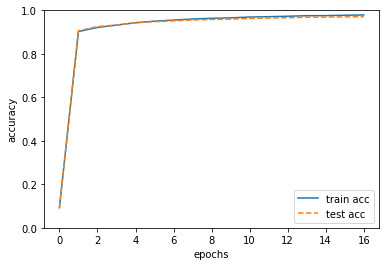

In [57]:
import load_data as l

if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True)

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]


    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例
    network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)
     
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        #for param in ("W1","W2","B1","B2"):
            #network.params[param]=two_Net.params[param]-learning_rate*grad[param]

        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]
        #print(network.params['W1'].shape)
        #print(grad['W1'].shape)
        #print(network.params['W2'].shape)
        #print(grad['W2'].shape)
        loss=network.loss(x_batch,t_batch)
        train_loss_list.append(loss)
        if i%iter_per_epoch==0:
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

## 深度学习进阶

在通过numpy构建神经网络基础上，对神经网络各个部分进行进一步的讨论，包括
* 首先讨论为什么回产生梯度下降效果不好，出现局部最小，鞍点情况
* batch size 问题
* 参数更新方法: 除了SGD 随机梯度下降法外，还有Monmentum、AdaGrad、Adam等效率更高、准确度更好的方法
* 讨论初始权重的选择方法，例如Xavier、He初始值等
* 同使用Batch Normalization对Affine层中各节点输入值进行标准化处理，可以加速学习，并使得初始值变得健壮
* 抑制过拟合的正则技术有权重衰减，Dropout等




### 局部最小值 (local minima) 與鞍點 (saddle point)
> 参考
https://www.youtube.com/watch?v=QW6uINn7uGk&list=PLJV_el3uVTsMhtt7_Y6sgTHGHp1Vb2P2J&index=4

抽梯度角度而言、三种情况下梯度向量都可以为0，函数到达了critical point
 1. 全局最小值
 2. 局部最小值
 3. 鞍点

 故在表述上可以认为，（损失函数的）loss无法再减小，因为 卡在了critical point

 鞍点与局部最小值的critical point 不同处在于，如果到达局部最小，那么由于其点四周值都会比该点大，那么就很难通过梯度方向逃离（因为梯度负方向都指向该点）

 但鞍点却有（两侧）下降方向。

 <img src="figs\cirtial point.jpg" height="50%" width="50%">



### mini-batch 
回顾之前网络建立后，开始进行深度学习步骤，首先要载入训练集数据，但并不是一次性载入所有数据，而是将所有训练集分为大小相同的batch（或称为mini-batch），

网络运行步骤：

1. 每次读取一个batch数据，对读取数据进行一次梯度下降，更新权重

2. 当读取完所有数据后，完成一个epoch

3. 当完成一层epoch后，一般要进行一次shuffle-洗牌，（上文例子代码是每次batch都随机读取数据）

 <img src="figs\batch.jpg" height="50%" width="50%">

例如6000张照片，设一个batch为100张，那么需要读取60次batch才能全部读完，完成一个epoch，即一个epoch对应600个batch



对比如果一次性载入所有数据（一个batch对应所有训练集），或者分为多个batch，对训练有什么区别

 <img src="figs\batch2.jpg" height="40%" width="40%"  /> 

对比发现，

左边一次性载入训练数据，看起来好像运行时间长（cooldown），但是直接一次性进行梯度更新

右边分多个batch载入，每次载入时都要进行梯度更新，看起来好像运行时间短，但是噪声大（梯度不断更新，权参不断更新，函数反复找到下降方向）

---
但是由于在计算深度学习的时候一般用的是GPU，实现的是并行运算，故一个batch计算时候，内部数据是在平行运算，所需时间并不是很多。

而考虑
每次读书的时候，可以完全专心读，但是中断了重新读会有个投入时间。
那么一口气吧一本书读完，还是分很多段慢慢读，哪个更快。
 
 <img src="figs\batch3.jpg" height="30%" width="30%">

所以batch大小和其运行时间（cooldown）关系不大，也不是选择不同batch大小的原因

---
 
选取不同batch size的主要原因是，小的（或者合适的）batch size 对比大的batch size 模型精度会更高。

较大的batch，例如包含了全部训练集，就如一锤子买卖，一次性的算出梯度向量，整个过程中，就会访问函数的大部分点，容易遇到局部最小值无法自拔。

而较小的batch，每个批次包含训练集较少，相当于多个（独立）较小的数据集上完成一次梯度下降，虽然看起来噪音（找到整体误差函数loss梯度方向）较大，但恰恰是由于是多个独立数据集梯度，使得有很大概率，其中某几个batch对应梯度下降过程跳过了了局部最小。

 <img src="figs\batch4.jpg" height="30%" width="30%">

 例如图中Full bath 所有训练数据代入执行一次梯度下降，就卡在了局部最小。而较小batch size 的l1，l2 中虽然了在执行梯度下降时卡在局部最小，但l2幸运地跳过了局部最小。

 ** 同时研究也表明，相对于大的batch size，小batch size 泛化能力较好，即test效果较好**
 
总结：

 <img src="figs\batch5.jpg" height="30%" width="30%">


### 参数更新方法

通过构建Optimizer类(优化类），来包装参数更新方法，例如SGD类


In [20]:
class SGD:
    def __init__(self,learning_rate):
        self.learning_rate = learning_rate
        
    def update(self,params:dict,grad:dict):
        
        for key in params.keys():
            params[key] -= self.learning_rate * grad[key]
        

In [ ]:
import load_data as l
from matplotlib import pyplot as plt
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True)

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]


    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例
    network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)
    optimizer=SGD(learning_rate=0.8)# 实例化优化类对象
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)

        
        #print(network.params['W1'].shape)
        #print(grad['W1'].shape)
        #print(network.params['W2'].shape)
        #print(grad['W2'].shape)
        loss=network.loss(x_batch,t_batch)
        train_loss_list.append(loss)
        if i%iter_per_epoch==0:
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

SGD：
$$w=w-\mu \times \frac{\partial C}{\partial w}$$
$\mu$为学习率，$C$为损失函数

的优点在于简单，但是遇到非均向（aniotropic）函数下降效率就会很低。

为此引入其他函数

### Momentum 优化函数

可参考：
https://www.youtube.com/watch?v=zzbr1h9sF54&t=1153s

Momentum(动能)其原理是借用物理动能的概念，在梯度下降时，保留上一个梯度下降的动能，从而对本次梯度进行调整，使得其变化更为光滑。

 <img src="figs\Momentum1.jpg" height="30%" width="30%">

例如图中代表关于w权参损失函数图像，如果采用SGD方法进行优化，那么到大 saddle point（鞍点） 以及minima point （局部最小）时，就权参梯度为0，梯度更新直接停住。

但在实际的物理世界中，从高处下降势必有动能，到达saddle mimina 函数点都还会向前冲段距离（梯度方向）直到动能消失。Momentum就模拟了这个现象。

对应换做Momentum优化方法，在图中，由于还要加上上一次梯度向量更新的动能（包括方向大小），在遇到minima时候，直接冲了过去。

从二维（等高线）角度看，即每次梯度更新都是前一个$W$顺着梯度向量反方向更新，但是在第二次更新时候，就必须考虑之前梯度残留势能，得到的方向是 $-\nabla C(w)_{new} +  \nabla C(w)_{old}$

 <img src="figs\Momentum2.jpg" height="30%" width="30%">


Momentu 公式以及对应numpy代码

1. 当前梯度更新加入上一个梯度更新动能影响：
$$v=av+(-\frac{\partial C}{\partial W})$$
2. 对权参进行梯度更新：
$$W=W+av$$



In [23]:
class Momentum:
    def __init__(self,learning_rate=0.01,momentum=0.9):
        self.learning_rate = learning_rate
        self.M=momentum#动能参数
        self.v=None #上一个梯度动能
    def update(self,params,grad):
        if self.v is None:#判断是否是第一次梯度更新,如果是那么动能就为0
            self.v={}
            for key,val in params.items():
                self.v[key]=np.zeros_like(val)#获的对应权参，偏参形状，设置为0矩阵
        for key in params.keys():
            self.v[key]=self.M*self.v[key]-self.learning_rate*grad[key]#-self.learning_rate*grad[key]就是SGD对应单纯梯度更新
            #params[key]=params[key]+self.v[key]
            params[key] += self.v[key]
        
        

In [ ]:
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
import numpy as np 
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True)

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]


    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例
    network=layer.TwoLayerNet(input_size=784,hidden_size=50,output_size=10)
    #optimizer=SGD(learning_rate=0.8)# 实例化优化类对象
    optimizer=Momentum(learning_rate=0.01,momentum=0.9)
    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)

        
        #print(network.params['W1'].shape)
        #print(grad['W1'].shape)
        #print(network.params['W2'].shape)
        #print(grad['W2'].shape)
        loss=network.loss(x_batch,t_batch)
        train_loss_list.append(loss)
        if i%iter_per_epoch==0:
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    #plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

### 学习率衰减法
神经网络超参中，学习率是非常重要，学习率过小，会导致网络学习时间过长；学习率过大，**会导致学习发散而无法正常进行** 

为此，在关于学习率的有效技巧中，包括**学习率衰减**(learning rate decay)方法，即随着网络学习进行，使得学习率逐渐减小。

> 神经网络学习中，以开始“多”学，然后逐渐“少学”的方法，在网络学习中经常使用。



 深度学习中，除了critical point 所包含的saddle point 鞍点，以及minima point局部极小值的情况，还可以能出现由于梯度向量模（或者说学习率乘梯度得到的步长）过大，
 
 造成关于权参损失函沿着梯度方向，用力过猛荡过全局最小值的现象：

  <img src="figs\AdaGrad1.jpg" height="50%" width="50%">

  例如上图中，loss图显示后期loss无法减少，但是梯度却没有完全减少，说明在后期，出现了荡过极小值山谷现象。

总结而言，为了实现有效的gradient descent，在误差函数图象较为平缓部分，步长应该要大一些，能快速实现误差函数下降；而在误差函数较为陡峭部分，步长要变小一些，使得gradient descent不至于荡过全局极小值点。

为此学习率控制参数learning rate（$\sigma$)是一个跟随梯度下降周期$t$以及学习率$\mu$的变量，称为参数依赖parameter dependent.

<img src="figs\AdaGrad2.jpg" height="50%" width="50%">

参数依赖的学习衰减方法包括几种
1. AdaGrad方法
2. RMSProp方法

### AdaGrap 方法
> 李洪毅中AdaGrap方法与书中有差异，但原理相同

AdaGrap 方法基本原理就是累计梯度越大（梯度平方和平均），对应的步长就越小（1/梯度平方和）

>书中公式：
$$h \leftarrow h+\frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}  $$
$$W \leftarrow W- \mu \frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$$

---

<img src="figs\AdaGrad3.jpg" height="50%" width="50%">

上面公式可以看出，当前权参$\Theta$收到了以往梯度大小（不考虑方向）的影响($\sigma$),由于是倒数，($\sigma$)越大，那么当前梯度下降就越小，起到了减缓作用。

### RMSPro 方法
RMSProp 方法不是将过去所有的梯度一视同仁地相加，而是逐渐遗忘过去的梯度，在做加法运算时将新梯度的信息更多反映出来。这种操作从专业角度上，称为“移动指数平均”，显指数函数式地减小过去的梯度的尺度。


<img src="figs\RMSProp1.jpg" height="50%" width="50%">

RMSpro中$a$是一个超参，需要设定，其比较大的时候，代表过去的梯度对$\sigma$影响比较大，现在梯度影响比较小$1- \sigma$,但由于最终是$\frac{\mu}{\sigma}$其与学习率构成的对梯度$g$作用是反向的。

In [16]:
class AdaGrad:
    def __init__(self,learning_rate=0.01):
        self.lr=learning_rate
        self.h=None
    def update(self,params,grads):
        if self.h is None:
            self.h={}
            for key,val in params.items():
                self.h[key]=np.zeros_like(val)
        for key in params.keys():
            self.h[key]+=grads[key]*grads[key]
            params[key]-=(grads[key]*self.lr)/(np.sqrt(self.h[key])+1e-7)# 加入1e-7,避免出现self.h[key]为0的情况
   

In [ ]:
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
import numpy as np 
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    test_lost_list=[]
    train_acc_list=[]
    test_acc_list=[]
  

    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    network=layer.TwoLayerNet(input_size=784,hidden_size=50,output_size=10)#图像为25*25黑白图像，故摊平后为784数组
    #optimizer=SGD(learning_rate=0.8)# 实例化优化类对象
    #optimizer=Momentum(learning_rate=0.01,momentum=0.9)

    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    optimizer=AdaGrad(learning_rate=0.01 )
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)


        if i%iter_per_epoch==0:
            train_loss=network.loss(x_train,t_train)
            train_loss_list.append(train_loss)
            test_loss=network.loss(x_test,t_test)
            test_lost_list.append(test_loss)
            
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    
    
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    plt.plot(x, test_lost_list, label='test loss', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

### Learning Rate Scheduling
虽然通过引入以往梯度的影响参数$\sigma$，可以有效地避免梯度下降中陷入saddle point，局部最小值等问题，但依然会因为$\sigma$的值不断积累，出现梯度下降暴走现象（左小图），为此对学习率本身进行变化**之前学习率都是不变的**。

具体就是使得学习率$\eta$变成梯度下降时间$t$的函数，使得学习率随着时间梯度下降，从而进一步改善梯度下降。（右小图）

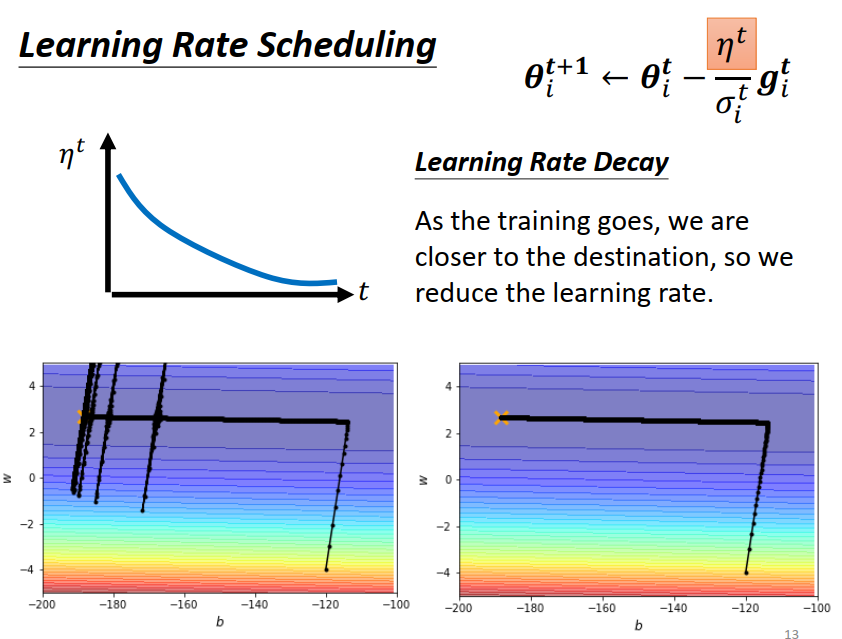

又有论文指出，可以使用先上升再下降非法，能搞好提高梯度下降精度（war mup）

## 神经网络优化方法总结（Optimizaiton）

<img src="figs\summary of optimization.jpg" height="50%" width="50%">

权参$\Theta $的误差函数进行梯度下降$g$后更新权参，为了避免出现梯度陷入critical point现象，使用3钟结合的方法进行改进
1. 引入动能Momentum使得当前的梯度更新具有（或保留了部分）之前梯度向量的大小方向。
2. 引入$\frac{1}{ \mu}$其中$\mu$为之前梯度的平方和开放平均，或变形，实现当当前梯度过大，对其进行“刹车”，避免越过最小值。
3. 引入学习率随时间变化率$\eta ^t$，即随着时间变化，学习率不是固定的，而是指数下降（或先上升再下降）

* 一般采用多种方法结合的实际函数，例如Adma
* pytorch 中，已经预定义了相关优化函数，直接调用即可

## 权参初始值设定

> 在学习过程中，如果权参过大，那么意味着模型中对应的x贡献比较大，模型对训练集拟合会比较好，但对测试集不一定，即出现了过拟合现象。
但也不能在开始的时候（第一次forward前）将权参直接设为0，或一样的极小值，这样会导致在训练中权参相同的更新，出现“权重均一化”，为此必须**随机**生成权重。

---

在神经网络中，权参初始值非常重要，很多时候，初始值的选定关系到神经网络的学习是否能够成功。

从图像可知，当初始权重设置为std=1的正态分布时，各个层正向传播，通过sigmod(z)激活函数得到的激活值都呈现0-1两端集中分布。回顾反向传播时，层节点反向输出$=\frac{\partial L}{\partial y}f'(x)$,其中$\frac{\partial L}{\partial y}$是该节点正向输出的激活值，关于损失函数的偏导，$f'(x)$为激活导函数代入正向输入值。若$y \rightarrow (0,1)$这将导致在反向传播时，求偏导趋向于0。最终，偏向0，1的数据分布会造成反向传播中梯度值不断变小，最后消失。

这个问题称为 **梯度消失(gradient vanishing)** 问题，层次加深的网络中，梯度消失问题还会更严重。

---

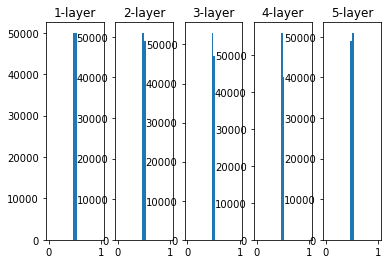

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import myfucntion.Function as mf 

if __name__=="__main__":
    x=np.random.randn(1000,100)#生成1000个，100列的正态分布随机数
    node_num=100
    hidden_layer_size=5 
    activations={}
    std=input("输入正态分布标准差：")
    for i in range(hidden_layer_size):
        if i!=0:
           x=activations[i-1]#上一个隐藏层得到的激活值
        w=np.random.randn(node_num,node_num)*float(std)# 权参初始值是一个100行100列的矩阵，其数据为标准差为1的随机数。
        z=x@w 
        a=mf.sigmoid(z)#激活函数
        activations[i]=a
    for i,a in activations.items():
        plt.subplot(1,len(activations),i+1)
        plt.title(str(i+1)+"-layer")
        plt.hist(a.flatten(),30,range=(0,1))
    plt.show()

虽然设置W初始值的标准差设置较小（std-0.001），可以使得激活值不在0，1两端分布，但是得到的值分布有所偏向，即每一层各个神经元都得到同一个结果，

这就使得层中设立100个神经元计算没有意义，因为计结果都一样，那么用每层都用1个神经元即可。可以认为激活值在分布上有所偏向会出现“表现力受限”问题。

> 神经网络各层的激活值的分布都要求有适当的广度。通过在各层传递多样性（可以理解为图较扁平）的数据，神经网络可以进行高效学习。反之，若传递的是有
偏向的数据，就会出现梯度消失或表现力受限问题，可能导致学习无法进行。


 ### Xavier权参随机初始化
 Xavier 方法中，为了使得各层激活值呈现具有相同的数据分布广度，推导了合适的权重尺度。结论是，如果前一层的节点数为$n$,

那么权参初始值使用标准差为$\frac{1}{\sqrt{n}}$的分布

---

Relu 权重初始值

在使用sigmoid以及tanh作为激活函数时，权参初始函数使用Xavier，但当权参使用Relu时，一般使用“He初始值”

其标准差为为$\frac{2}{\sqrt{n}}$的分布

---
在各个网络类内部实现Xavier或He的对权参初始化过程

```python
class ThreeLayerNet_Op(TwoLayerNet):
        def __init__(self,input_size=784,hidden_size=50,m_hiddent_size=50,output_size=10):
            """_summary_第三层网络激活函数使用sigmoid，权参初始std使用Xavier（1/np.sqrt(前面节点数目)

            Args:
                input_size (int, optional): _description_. Defaults to 784.
                hidden_size (int, optional): _description_. Defaults to 50.
                m_hiddent_size (int, optional): _description_. Defaults to 50.
                output_size (int, optional): _description_. Defaults to 10.
            """
 
                # 初始化权重
            self.params = {}
            self.params['W1'] =   np.random.randn(input_size, hidden_size)*(2/np.sqrt(input_size))
            self.params['b1'] = np.zeros(hidden_size)
            self.params['W2'] =  np.random.randn(hidden_size, m_hiddent_size) *(2/np.sqrt(hidden_size))
            self.params['b2'] = np.zeros(m_hiddent_size)
            self.params['W3'] =  np.random.randn(m_hiddent_size, output_size) *(2/np.sqrt(m_hiddent_size))
            self.params['b3'] = np.zeros(output_size) 
```


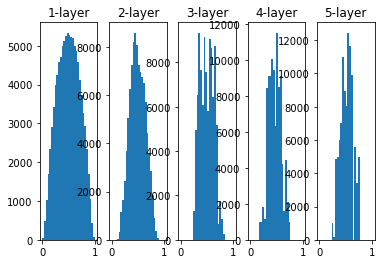

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import myfucntion.Function as mf 

if __name__=="__main__":
    x=np.random.randn(1000,100)#生成1000个，100列的正态分布随机数
    node_num=100
    hidden_layer_size=5 
    activations={}
    std=input("输入正态分布标准差：")
    for i in range(hidden_layer_size):
        if i!=0:
           x=activations[i-1]#上一个隐藏层得到的激活值
        #w=np.random.randn(node_num,node_num)*float(std)# 权参初始值是一个100行100列的矩阵，其数据为标准差为1的随机数。
        w=np.random.randn(node_num,node_num)*(1/np.sqrt(node_num))# 权参初始值是其前一层神经元n的开方倒数，即Xavier。
        z=x@w 
        a=mf.sigmoid(z)#激活函数
        activations[i]=a
    for i,a in activations.items():
        plt.subplot(1,len(activations),i+1)
        plt.title(str(i+1)+"-layer")
        plt.hist(a.flatten(),30,range=(0,1))
    plt.show()


使用Xavier作为权参的初始分布函数后，每一层得到的激活值都呈现广度比较均衡的正态分布，但是又有一定的偏锋，为了改善这一情况

使得各个激活层的激活值呈现更好的正态分布，可使用tanh函数代替sigmod激活函数。tanh与sigmod一样都是s型函数，但tanh是关于原点(0,0)

对称的S群星，而sigmod 是关于（0，0.5）对称。

<img src="https://img-blog.csdnimg.cn/20200318122213988.png#pic_center">
<img src="https://img-blog.csdnimg.cn/20200318122408273.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L20wXzM4MDY1NTcy,size_16,color_FFFFFF,t_70#pic_center" height="30%" width="30%">

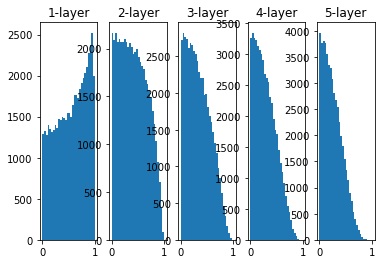

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import myfucntion.Function as mf 

def tanh(x:np.array)->np.array:
    rs=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return rs



if __name__=="__main__":
    x=np.random.randn(1000,100)#生成1000个，100列的正态分布随机数
    node_num=100
    hidden_layer_size=5 
    activations={}
    #std=input("输入正态分布标准差：")
    for i in range(hidden_layer_size):
        if i!=0:
           x=activations[i-1]#上一个隐藏层得到的激活值
        #w=np.random.randn(node_num,node_num)*float(std)# 权参初始值是一个100行100列的矩阵，其数据为标准差为1的随机数。
        w=np.random.randn(node_num,node_num)*(1/np.sqrt(node_num))# 权参初始值是其前一层神经元n的开方倒数，即Xavier。
        z=x@w 
        #a=mf.sigmoid(z)#激活函数
        a=tanh(z)
        activations[i]=a#保存当前层激活值
    for i,a in activations.items():
        plt.subplot(1,len(activations),i+1)
        plt.title(str(i+1)+"-layer")
        plt.hist(a.flatten(),30,range=(0,1))
    plt.show()

结合前面的优化函数、权参初始化的方法，对图片更新网络进行优化，并比较结果



In [ ]:
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
import numpy as np 
import myfucntion.optimizer as op
from importlib import reload
reload(layer)
if __name__=="__main__":
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组

    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    test_lost_list=[]
    train_acc_list=[]
    test_acc_list=[]
  

    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    
    #network=layer.TwoLayerNet_Op(input_size=784,hidden_size=50,output_size=10)#图像为25*25黑白图像，故摊平后为784数组
    network=layer.ThreeLayerNet_Op(input_size=784,hidden_size=50,output_size=10)
    #optimizer=SGD(learning_rate=0.8)# 实例化优化类对象
    #optimizer=Momentum(learning_rate=0.01,momentum=0.9)

    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    optimizer=op.AdaGrad(learning_rate=0.01 )
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        #y_p=twoNet.forward(batch_x_train)#二层网络返回预测值
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)


        if i%iter_per_epoch==0:
            train_loss=network.loss(x_train,t_train)
            train_loss_list.append(train_loss)
            test_loss=network.loss(x_test,t_test)
            test_lost_list.append(test_loss)
            
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    
    
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    plt.plot(x, test_lost_list, label='test loss', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

## Batch Normalization

之前通过随机生成权参改善方法（例如Xavir，He）等只能使得初始权参值得到改善，但由于输入层scale影响，导致损失函数不易于梯度下降，这就需要从根本第改变损失函数图像入手

Batch Normalizton 核心就是特征缩放（peature scaling）将神经网络输入数据进行标准化，从而减少scale尺度较大数据对整体网络的影响，

<img src="figs\batch norm0.jpg" height="30%" width="30%">

上图代表了损失函数的error surface，即多维度损失函数，在二维平面上的投影。可以看到，最终损失函数中，不同方向（权参方向）梯度下降速率不同，这也是导致critical point的根本原因（损失函数图像不均衡）

根本原因在于例如图中输入层$x_1$的scale较小，$x_2$的scale较大，而到达下一层的输入参数是是$x_1,x_2$与各自对应权参乘积相加$z=x_1 \times w_1+ x_2 \times w_2$

当对应的权参发生（同样）的改变时候$\Delta z=x_1 \times (w_1+\Delta w)+ x_2 \times (w_2+\Delta w)$，由于$x_2$ sclae较大，势必照成$ x_2 \times (w_2+\Delta w)$对$\Delta z$影响更大，

最终传递到输出层的损失函数$L$，导致了左小图的不对称error surface。

为此，在深度学习中使用的是特征缩放中的标准化（standarization）方法。即：

$$x_{std}^{i}=\frac{x^i - \mu_x}{\sigma_x}$$

其中 $\mu$为平均值，$\sigma$为标准差

> 可以使用sklearn中标准化方法进行处理

通过标准化处理，将使得error surface变得对称，如右小图，实现良好的梯度下降。

<img src="figs\batch norm1.jpg" height="30%" width="30%">


从网络内部计算图可以看到，normalization 不但发生在第一次input层，实际上在层的激活函数对应激活值$a$、或affine层

进行权参相乘后得到输入值$z$。激活值与输入值都可以进行normalization以改善error surface，对sigmoid激活函数，一般是对输入

$z$进行normalization。

---

Batch Normalization 称为 Batch缘故是在进行normalization时候，不是一次性对所有x_trian进行normalization，而是结合了之前的

batch方法，对分批载入网络并进行梯度下降的x_trian_batch进行normalization，这就带来一个问题，即每次batch的数据量有一定要求，才能
代表总体，或者说每次batch 的normalization才能差别不大。

<img src="figs\batch norm2.jpg" height="30%" width="30%">

如上图，对输入值$z$进行了normalization得到$\~{z}$，对比之前的神经网络，$z_1,z_2,...z_n$直接载入了对应的激活函数节点，相互之间没有了关系，到经过normalization后，$\~z_1,\~z_2,...\~z_n$之间相互影响（参考标准化公式），实际上构成了一个网络。

---

在进行normalization后，$\~z_1,\~z_2,...\~z_n$的平均数为0，可能会对网络学习造成一定影响，故此也会对normalization后输入值或激活值乘上一个向量并加一个向量，作为调整：
 $$\~z=\gamma \odot  \~z + \beta$$

 ---

 <img src="figs\batch norm4.jpg" height="30%" width="30%">

对x_train进行了batch normalization后，也要对x_test做batch normalization，如果test数据一次性都有，那么过程与

x_trian normalization一致。但在实际生产中，测试数据可能是流动载入，很可能无法攒够一个batch数据（例如100张图片）


那么就无法计算有效的一个batch的平均值与标准差。

为此pytorch中，使用移动平均法（当前时刻值=权重p*当前时刻值+（1-p）*上一个时刻值），在之前x_train进行normalization得到的一列($t$)批次，平均值与方程基础上，计算得到对应的x_test平均值与标准差，从而实现对x_test的normalization。

 

以下实验得到
如果对所有数据一次性进行 normalization，整体精度比不做normalization上升，得到的精度为
>16.0 个epoch后,训练集的精度为： 0.9815833333333334 测试集的精度为： 0.9653

如果使用 batch normalization，精度反而下降，甚至不如不做batch normalization，为：

>16.0 个epoch后,训练集的精度为： 0.9036 测试集的精度为： 0.8996

In [ ]:
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
import numpy as np 
import myfucntion.optimizer as op
from importlib import reload
reload(layer) 
if __name__=="__main__":
    stdsc=StandardScaler()

    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组
    x_train_std=stdsc.fit_transform(x_train)
     

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
import numpy as np 
import myfucntion.optimizer as op
from importlib import reload
reload(layer)
if __name__=="__main__":
    
    #对所有数据进行 normalization
    #stdsc=StandardScaler()
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组
    #x_train=stdsc.fit_transform(x_train)
    #x_test=stdsc.fit_transform(x_test)
    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    test_lost_list=[]
    train_acc_list=[]
    test_acc_list=[]
  

    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=10000#梯度下降迭代次数
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    
    #network=layer.TwoLayerNet_Op(input_size=784,hidden_size=50,output_size=10)#图像为25*25黑白图像，故摊平后为784数组
    network=layer.ThreeLayerNet_Op(input_size=784,hidden_size=50,output_size=10)
    #optimizer=SGD(learning_rate=0.8)# 实例化优化类对象
    #optimizer=Momentum(learning_rate=0.01,momentum=0.9)

    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    optimizer=op.AdaGrad(learning_rate=0.01 )
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        
        #实现batch normalization
        stdsc=StandardScaler()
         
        x_batch=stdsc.fit_transform(x_batch)
       
 
     
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)


        if i%iter_per_epoch==0:
            train_loss=network.loss(x_train,t_train)
            train_loss_list.append(train_loss)
            test_loss=network.loss(x_test,t_test)
            test_lost_list.append(test_loss)
            
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    
    
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    plt.plot(x, test_lost_list, label='test loss', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

## 正则化（降低过拟合）

发生过拟合的原因主要包括：

* 模型拥有大量参数、表现力强
* 训练数据太少

---

为了抑制过拟合，采用权值（权参）衰减 （weight decay），drop out方法。

### 权值（权参）衰减-L2正则化方法
> 权值衰减一直以来是一种经常被使用的抑制过拟合方法，该方法通过在学习过程中对大的权重进行惩罚，来抑制过拟合。
**很多过拟合就是因为权重参数取值过大照成的**


[参考](https://blog.csdn.net/program_developer/article/details/80867468)

L2正则化的目的就是为了让权重衰减到更小的值，在一定程度上减少模型过拟合的问题，所以权重衰减也叫L2正则化。

对应公式：

$$C=C_0+\frac{\lambda}{2} \times \sum_w {w^2} \cdots  (1)$$

其中$C,C_0$分别为原误差函数、更新后误差函数$\sum_w {w^2}$为所有层中权参和,n为训练集数

根据权参梯度下降公式，对$C$误差函数求导得到

$$\frac{\partial C}{\partial w}=\frac{\partial C_0}{\partial w}+\frac{\lambda}{n}\times w \cdots  (2)$$

根据求得梯度，乘上学习率$\mu$更新权参$w$:

$$w=w-\mu \times (\frac{\partial C_0}{\partial w}+\frac{\lambda}{n}\times w )\cdots   $$
$$\rightarrow$$
$$w=(1-\frac{\mu \times \lambda}{n})w-\mu \times \frac{\partial C_0}{\partial w} \cdots  (3)$$

在不使用L2正则化时，求导结果中$w$前系数为1，现在$w$前面系数为$1-\frac{\mu \times \lambda}{n}$，因为$\mu,\lambda,n$都是正的，所以$1-\frac{\mu \times \lambda}{n}$小于1，它的效果是减小$w$，这也就是权重衰减（weight decay）的由来。当然考虑到后面的导数项，$w$最终的值可能增大也可能减小。

#### 权重衰减（L2正则化）的作用

作用：权重衰减（L2正则化）可以避免模型过拟合问题。

思考：L2正则化项有让w变小的效果，但是为什么w变小可以防止过拟合呢？

原理：
1. 从模型的复杂度上解释：更小的权值w，从某种意义上说，表示网络的复杂度更低，对数据的拟合更好（这个法则也叫做奥卡姆剃刀），而在实际应用中，也验证了这一点，L2正则化的效果往往好于未经正则化的效果。
2. 从数学方面的解释：过拟合的时候，拟合函数的系数往往非常大，为什么？如下图所示，

<img src="https://img2020.cnblogs.com/blog/1015018/202005/1015018-20200515174652118-30471456.png">

过拟合，就是拟合函数需要顾忌每一个点，最终形成的拟合函数波动很大。在某些很小的区间里，函数值的变化很剧烈。这就意味着函数在某些小区间里的导数值（绝对值）非常大，由于自变量值可大可小，所以只有系数足够大，才能保证导数值很大。而正则化是通过约束参数的范数使其不要太大，所以可以在一定程度上减少过拟合情况。

----

对应numpy实现：
``` python

    def loss(self,x,t):
        y=self.predict(x,t)
        weight_decay = 0
        for idx in range(i,hidden_layer_num+1):
            weight_decay=np.sum(self.params['W'+str(idx)]**2)
        loss=self.lastlayer.predict(y,t)+self.lambda*weight_decay*0.5#损失函数加上所有权参平方和
        #实际上由于loss得到的是一个具体值，其导数=1，代入backward方程没有影响。
        return loss
    def gradient(self, x, t):
 
    ...
        for idx in range(1, self.hidden_layer_num+2):
            #通过loss函数加上权参L2值，梯度增大self.weight_decay_lambda * self.layers['Affine' + str(idx)].W，使得权参更新时，对应权参变小
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads    
```

以下在小规模数据中实现7层网络的L2权值衰减，为了实验减少训练的数据（300张），人为造成过拟合现象

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
#from common.multi_layer_net import *
import numpy as np 
import myfucntion.optimizer as op
from importlib import reload
from common.optimizer import *
reload(layer)
if __name__=="__main__":
    
    #对所有数据进行 normalization
    stdsc=StandardScaler()
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组
    x_train=x_train[:300]
    t_train=t_train[:300]
    x_train=stdsc.fit_transform(x_train)
    x_test=stdsc.fit_transform(x_test)
    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    test_lost_list=[]
    train_acc_list=[]
    test_acc_list=[]
    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=1000#梯度下降迭代次数
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    
    #network=layer.TwoLayerNet_Op(input_size=784,hidden_size=50,output_size=10)#图像为25*25黑白图像，故摊平后为784数组
    network=layer.MultiLayerNet(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10)
    
    optimizer=SGD()# 实例化优化类对象
    #optimizer=Momentum(learning_rate=0.01,momentum=0.9)
    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    #optimizer=op.AdaGrad(learning_rate=0.01 )
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        
        #实现batch normalization
        stdsc=StandardScaler()
         
        x_batch=stdsc.fit_transform(x_batch)
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)


        if i%iter_per_epoch==0:
            train_loss=network.loss(x_train,t_train)
            train_loss_list.append(train_loss)
            test_loss=network.loss(x_test,t_test)
            test_lost_list.append(test_loss)
            
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    
    
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    plt.plot(x, test_lost_list, label='test loss', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

### DropOut
[参考](https://zhuanlan.zhihu.com/p/38200980)

对于复杂的网络L2方法显得不足，一般会使用Dropout方法。

简而言之，Dropout就是在学习过程中随机删除神经元方法：

<img src="https://pic2.zhimg.com/v2-5530bdc5d49f9e261975521f8afd35e9_r.jpg">

1. 在训练时，根据一定概率$p$随机删除一些**隐藏层**的节点，被删除的隐藏层的神经元节点不再进行信号传输。

2. 训练时，每传输一次数据，都会随机选择要删除的神经元。
3. 测试时，虽然会传递所有神经元信号，但是对各个神经元的输出，要乘上训练时的删除比例后再输出。

---

为什么说Dropout可以解决过拟合

（1）取平均的作用： 先回到标准的模型即没有dropout，我们用相同的训练数据去训练5个不同的神经网络，一般会得到5个不同的结果，此时我们可以采用 “5个结果取均值”或者“多数取胜的投票策略”去决定最终结果。例如3个网络判断结果为数字9,那么很有可能真正的结果就是数字9，其它两个网络给出了错误结果。这种“综合起来取平均”的策略通常可以有效防止过拟合问题。因为不同的网络可能产生不同的过拟合，取平均则有可能让一些“相反的”拟合互相抵消。dropout掉不同的隐藏神经元就类似在训练不同的网络，随机删掉一半隐藏神经元导致网络结构已经不同，整个dropout过程就相当于对很多个不同的神经网络取平均。而不同的网络产生不同的过拟合，一些互为“反向”的拟合相互抵消就可以达到整体上减少过拟合。

（2）减少神经元之间复杂的共适应关系： 因为dropout程序导致两个神经元不一定每次都在一个dropout网络中出现。这样权值的更新不再依赖于有固定关系的隐含节点的共同作用，阻止了某些特征仅仅在其它特定特征下才有效果的情况 。迫使网络去学习更加鲁棒的特征 ，这些特征在其它的神经元的随机子集中也存在。换句话说假如我们的神经网络是在做出某种预测，它不应该对一些特定的线索片段太过敏感，即使丢失特定的线索，它也应该可以从众多其它线索中学习一些共同的特征。从这个角度看dropout就有点像L1，L2正则，减少权重使得网络对丢失特定神经元连接的鲁棒性提高。

---
实现时，将Dropout也视为一层，并跟随激活层，将通过将激活层得到的激活值随机屏蔽，实现dropout效果
对应python numpy实现

```python 
class Dropout:
     def __init__(self,dropout_ratio=0.5):
         self.dropout_ratio=dropout_ratio
         self.mask=None
     def forward(self,x):
         #该语句通过生成一个与x矩阵形状相同的随机矩阵(*x.shape将x.shape返回tuple数值化)
         #若随机矩阵数组大于0.5，那么对应矩阵位为True，否则为False，最终得到屏蔽矩阵
         self.mask=np.random.rand(*x.shape)>self.dropout_ratio
         return x*self.mask#匹配随机矩阵为False的数值
     def backward(self,dout):#正向传播时传递了信号的神经元，反向传播时按原样传递信号；正向传播时没有传递信号的神经元，反向传播时信号停留在那里。
         return dout*self.mask
```

>通过实验对比，在各个激活层后加入dropout层对比单纯使用L2实现weight decay有一定提升


In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import myLayer.layer as layer
#from common.multi_layer_net import *
import numpy as np 
import myfucntion.optimizer as op
from importlib import reload
from common.optimizer import *
from common.multi_layer_net_extend import   MultiLayerNetExtend
reload(layer)
if __name__=="__main__":
    
    #对所有数据进行 normalization
    stdsc=StandardScaler()
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组
    x_train=x_train[:300]
    t_train=t_train[:300]
    x_train=stdsc.fit_transform(x_train)
    x_test=stdsc.fit_transform(x_test)
    train_size=x_train.shape[0]# 获取行数
    train_loss_list=[]
    test_lost_list=[]
    train_acc_list=[]
    test_acc_list=[]
    ## 超参
    learning_rate=0.09#学习率
    batch_size=100# 每批次随机选取100张图像
    iters_num=1000#梯度下降迭代次数
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    
    #network=layer.TwoLayerNet_Op(input_size=784,hidden_size=50,output_size=10)#图像为25*25黑白图像，故摊平后为784数组
    network= MultiLayerNetExtend(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10)
    #network= layer.MultiLayerNet_dropout(input_size=784,hidden_size_list=[100,100,100,100,100,100],output_size=10)
    
    optimizer=SGD()# 实例化优化类对象
    #optimizer=Momentum(learning_rate=0.01,momentum=0.9)
    #optimizer=Momentum(learning_rate=0.8,momentum=0.9)当学习率设为0.8而非0.1时，准确率最高不过0.2左右，可能由于步长过大，无法达到梯度方向。
    #optimizer=op.AdaGrad(learning_rate=0.01 )
    # 开始迭代梯度下降：
    iter_per_epoch=max(train_size/batch_size,1)
    print("一个epoch（读取所有",train_size,"张图片)","每个梯度下降载入批次(batch_zie)=",batch_size,"需要",iter_per_epoch,"次")
    for i in range(iters_num):
        
        #随机载入100个图像 
        batch_mask=np.random.choice(train_size,batch_size)# 随机选取100个图像的索引 
        x_batch=x_train[batch_mask]# 一次训练载入train
        t_batch=t_train[batch_mask]
        
        #实现batch normalization
        stdsc=StandardScaler()
         
        x_batch=stdsc.fit_transform(x_batch)
        #grad=network.total_numerical_gradient(x_batch,t_batch)#经过梯度下降法更新权参
        grad=network.gradient(x_batch,t_batch)
        ## 修改 twoNet实例的成员变量，结合梯度更新该实例的权参、偏参
        optimizer.update(network.params,grad)


        if i%iter_per_epoch==0:
            train_loss=network.loss(x_train,t_train)
            train_loss_list.append(train_loss)
            test_loss=network.loss(x_test,t_test)
            test_lost_list.append(test_loss)
            
            train_acc=network.accuracy(x_train,t_train)
            test_acc=network.accuracy(x_test,t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("第",i,"次梯度下降")
            print(i/iter_per_epoch,"个epoch后,训练集的精度为：",train_acc,"测试集的精度为：",test_acc)
    # 绘制图形
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()
    
    
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_loss_list))
    plt.plot(x, train_loss_list, label='train loss')
    plt.plot(x, test_lost_list, label='test loss', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

## 超参数(hyper parameter)验证

> 超参数包括学习率、网络节点数量、batch size、训练次数等

### 超参的验证

超参的验证不能使用测试集，而应该使用验证集

---
模型数据使用对应

* train data: 训练数据，用于训练模型，通过梯度下降优化偏参、权参
* test data: 测试数据，用于测试模型，测试优化后偏参、权参效果
* validation data: 验证数据，验证超参是否合适

为了方便理解，人们常常把这三种数据集类比成学生的课本、作业和期末考：

* 训练集——课本，学生根据课本里的内容来掌握知识
* 验证集——作业，通过作业可以知道不同学生实时的学习情况、进步的速度快慢
* 测试集——考试，考的题是平常都没有见过，考察学生举一反三的能力

可以认为，验证集与测试集作用类似，不过是为了找到合适的超参，而训练集相当于最后一次的评判，故不能用测试集来代替验证集

因为会导致找到的超参在评价模型时候得到虚高的分数，而丧失了泛化能力。

---


为了实现三个数据集（train、test、vlid的划分），可以通过numpy手工实现，也可以同sklearn实现
 
三个数据集划分顺序是
1. 首先划分 train data，test data，其中test data保留，作为最后（一次性）判断模型（包含优化后的权参、偏参，以及通过验证集验证找到超参）
2. 将train data再划分为train data与validation data

---

> 一般要将train data 首先打乱（shuffle），当然这也会将后期划分的validation data 打乱，以此消除数据序列偏向。但时间序列数据不能打乱。可以使用 sklearn.utils.shuffle 来打乱样本顺序。


In [14]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=9ff145855a1be1626a0f4bdb6ab3286b9fc7cd1e68384e78fab40299f22c84df
  Stored in directory: c:\users\tom\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [7]:
import sklearn 
import load_data as l
def my_Dataloder(num=500):
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组
    x_train,t_train=sklearn.utils.shuffle(x_train,t_train)
    x_train=x_train[:num]
    t_train=t_train[:num]
    #进一步将训练集划分为训练集和验证集
    validation_rate=0.2
    validation_num=int(x_train.shape[0]*validation_rate)
    x_val=x_train[:validation_num]
    t_val=t_train[:validation_num]
    x_train=x_train[validation_num:]
    t_train=t_train[validation_num:]
    
    return x_train,t_train,x_val,t_val, x_test, t_test
    
    



### 超参数优化
不同于权参、偏参可以用数学方法（梯度下降）进行更新优化，并有很多改良优化方法，Momentum等。

超参优化更多是靠运气，不断在验证集上迭代尝试

具体而言，就是逐渐缩小超参的“好值”存在范围，即一开始先大概设定范围，从这个范围中随机抽取一个超参（采样）

用这个采样（在验证集上）进行识别精度的评估；然后多次重复该操作，观察识别精度的结果，根据这个结果缩小“好值”

的范围。同重复该操作，就可以逐步确定超参数的合适范围。

相关的步骤如下：

0. 设定初始超参的范围

1. 从设定的超参范围中随机采样

2. 使用步骤1中采样得到的超参值进行学习，通过**validation data**评估识别精度（但是epoch要设置相对较小）。

3. 重复步骤1，2（n次），根据识别精度效果，缩小超参范围。

4. 不断缩小超参范围，最后从中选取一个合适的值。

---
> 除了这种随机超参优化方法，还有贝叶斯等更好的方法

实现方法
```python
trainer = Trainer(network, x_train, t_train, x_val, t_val,epochs=epocs, mini_batch_size=100,
                        optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
trainer.train()

return trainer.test_acc_list, trainer.train_acc_list
```

以上Train类包装了神经网络训练方法，在训练权参、偏参时，x_val,t_val初始位置为x_test,t_test

说明在实现时候步骤是一致的，不同的是train在开始一批次梯度下降前，赋予超参（例如学习率）一个范围随机值，通过训练

得到的模型再在对应的validation data上验证（注意此时不是验证整体模型，而是验证代入的超参在该批次梯度下降的效果）。

最后才是代入test data进行测试。

```python
# 超参数的随机搜索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 指定搜索的超参数的范围===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list
```



通过以下代码执行结果，不断对比结果，就可以找到超参合适的区间，并从中选取一个值作为超参值

In [ ]:
from common.trainer import Trainer# 
from common.multi_layer_net import MultiLayerNet
import numpy as np
import matplotlib.pyplot as plt
import load_data as l
import sklearn 
if __name__ == '__main__':
    
    #(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

    # 为了实现高速化，减少训练数据
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=True,one_hot_label=True,flatten=True)#flatten是否将矩阵变为一维数组

    x_train = x_train[:500]
    t_train = t_train[:500]

    # 分割验证数据
    validation_rate = 0.20
    validation_num = int(x_train.shape[0] * validation_rate)
    x_train, t_train = sklearn.utils.shuffle(x_train, t_train)
    x_val = x_train[:validation_num]
    t_val = t_train[:validation_num]
    x_train = x_train[validation_num:]
    t_train = t_train[validation_num:]

    #为了简化运算，直接调用MultiLayerNet多层神经网络类，以及Train，训练类，并包装成
    def __train(lr, weight_decay, epocs=50):
        network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                                output_size=10, weight_decay_lambda=weight_decay)
        
        ##
        trainer = Trainer(network, x_train, t_train, x_val, t_val,
                        epochs=epocs, mini_batch_size=100,
                        optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
        trainer.train()

        return trainer.test_acc_list, trainer.train_acc_list
    
    optimization_trial=100
    results_val={}
    results_train={}
    
    for _ in range(optimization_trial):
        #循环100次，每次在一定范围内随机选取超参的值
        lr=10**np.random.uniform(-8,-3)
        weight_decay=10**np.random.uniform(-6,-3)
        val_acc_list,train_acc_list=__train(lr=lr,weight_decay=weight_decay,epocs=10)
        print("val acc:"+str(val_acc_list[-1]))
        print("train acc:"+str(train_acc_list[-1]))
        print("lr="+str(lr))
        print("weight decay="+str(weight_decay))
        print("#########################################")
        key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)

        results_val[key] = val_acc_list
        results_train[key] = train_acc_list
        # 绘制图形========================================================
        print("=========== Hyper-Parameter Optimization Result ===========")
        graph_draw_num = 20
        col_num = 5
        row_num = int(np.ceil(graph_draw_num / col_num))
        i = 0
        
    for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
        print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

        plt.subplot(row_num, col_num, i+1)
        plt.title("Best-" + str(i+1))
        plt.ylim(0.0, 1.0)
        if i % 5: plt.yticks([])
        plt.xticks([])
        x = np.arange(len(val_acc_list))
        plt.plot(x, val_acc_list)
        plt.plot(x, results_train[key], "--")
        i += 1

        if i >= graph_draw_num:
            break

    plt.show()
        
        
        


## 总结神经网络结构以及优化

<img src="figs\FULL NET.jpg">